In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

/opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [3]:
# parameters
expName = 'b123_hor_vert'

testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(7534, 2562)
(7534,)


## train modellen

In [5]:
layersizes = [600,300,150,25]
epochss = [50, 100, 200, 500]

Epoch 1/50
7534/7534 [==============================] - 10s 1ms/step - loss: 78420941.0820
Epoch 2/50
7534/7534 [==============================] - 10s 1ms/step - loss: 49006600.8951
Epoch 3/50
7534/7534 [==============================] - 10s 1ms/step - loss: 44606218.9506
Epoch 4/50
7534/7534 [==============================] - 10s 1ms/step - loss: 40149222.5718
Epoch 5/50
7534/7534 [==============================] - 10s 1ms/step - loss: 37066328.0499
Epoch 6/50
7534/7534 [==============================] - 11s 1ms/step - loss: 33425955.2822
Epoch 7/50
7534/7534 [==============================] - 11s 1ms/step - loss: 24461561.9172
Epoch 8/50
7534/7534 [==============================] - 10s 1ms/step - loss: 10872653.2474
Epoch 9/50
7534/7534 [==============================] - 11s 1ms/step - loss: 7236242.0491
Epoch 10/50
7534/7534 [==============================] - 11s 1ms/step - loss: 6335631.8452
Epoch 11/50
7534/7534 [==============================] - 11s 1ms/step - loss: 5640592.7308


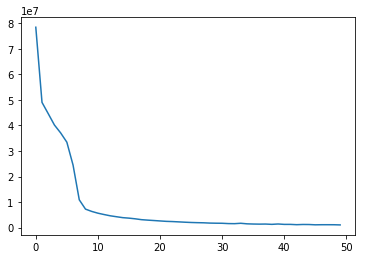

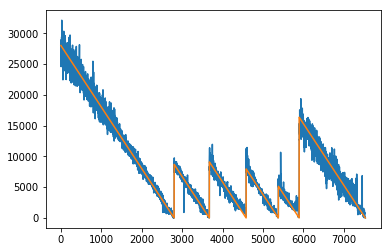

Epoch 1/100
7534/7534 [==============================] - 10s 1ms/step - loss: 77260587.5997
Epoch 2/100
7534/7534 [==============================] - 10s 1ms/step - loss: 48320485.8365
Epoch 3/100
7534/7534 [==============================] - 9s 1ms/step - loss: 43190368.5553
Epoch 4/100
7534/7534 [==============================] - 9s 1ms/step - loss: 39010347.5370
Epoch 5/100
7534/7534 [==============================] - 9s 1ms/step - loss: 36409708.1625
Epoch 6/100
7534/7534 [==============================] - 9s 1ms/step - loss: 31812482.1439
Epoch 7/100
7534/7534 [==============================] - 9s 1ms/step - loss: 21618307.4553
Epoch 8/100
7534/7534 [==============================] - 9s 1ms/step - loss: 10248329.6242
Epoch 9/100
7534/7534 [==============================] - 9s 1ms/step - loss: 7351836.1347
Epoch 10/100
7534/7534 [==============================] - 9s 1ms/step - loss: 7089632.8605
Epoch 11/100
7534/7534 [==============================] - 6s 862us/step - loss: 6395816.3

7534/7534 [==============================] - 6s 838us/step - loss: 1010554.4057
Epoch 90/100
7534/7534 [==============================] - 6s 846us/step - loss: 903916.8699
Epoch 91/100
7534/7534 [==============================] - 6s 841us/step - loss: 887451.1931
Epoch 92/100
7534/7534 [==============================] - 6s 838us/step - loss: 906270.2910
Epoch 93/100
7534/7534 [==============================] - 6s 843us/step - loss: 873017.0702
Epoch 94/100
7534/7534 [==============================] - 6s 841us/step - loss: 884468.8336
Epoch 95/100
7534/7534 [==============================] - 6s 842us/step - loss: 820610.3395
Epoch 96/100
7534/7534 [==============================] - 6s 849us/step - loss: 860560.1988
Epoch 97/100
7534/7534 [==============================] - 7s 864us/step - loss: 815922.4551
Epoch 98/100
7534/7534 [==============================] - 6s 848us/step - loss: 849141.6503
Epoch 99/100
7534/7534 [==============================] - 6s 840us/step - loss: 863616.2780


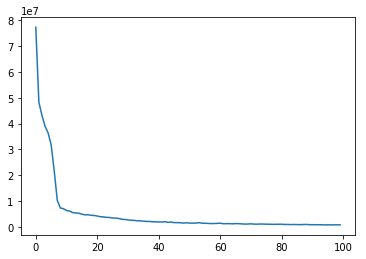

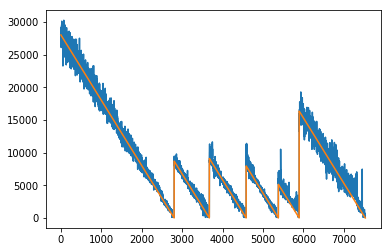

Epoch 1/200
7534/7534 [==============================] - 7s 924us/step - loss: 75891110.2442
Epoch 2/200
7534/7534 [==============================] - 7s 871us/step - loss: 48222679.3194
Epoch 3/200
7534/7534 [==============================] - 7s 875us/step - loss: 43636469.5992
Epoch 4/200
7534/7534 [==============================] - 6s 846us/step - loss: 39236373.0948
Epoch 5/200
7534/7534 [==============================] - 6s 841us/step - loss: 35923155.4404
Epoch 6/200
7534/7534 [==============================] - 6s 844us/step - loss: 30987291.2896
Epoch 7/200
7534/7534 [==============================] - 6s 847us/step - loss: 18074051.0385
Epoch 8/200
7534/7534 [==============================] - 6s 842us/step - loss: 7892167.4920
Epoch 9/200
7534/7534 [==============================] - 6s 842us/step - loss: 6771758.3630
Epoch 10/200
7534/7534 [==============================] - 6s 840us/step - loss: 6003619.3310
Epoch 11/200
7534/7534 [==============================] - 6s 843us/step 

7534/7534 [==============================] - 6s 859us/step - loss: 362559.7931
Epoch 90/200
7534/7534 [==============================] - 7s 875us/step - loss: 468997.4931
Epoch 91/200
7534/7534 [==============================] - 6s 850us/step - loss: 363485.8078
Epoch 92/200
7534/7534 [==============================] - 6s 852us/step - loss: 382158.1402
Epoch 93/200
7534/7534 [==============================] - 7s 874us/step - loss: 456033.5927
Epoch 94/200
7534/7534 [==============================] - 7s 973us/step - loss: 348598.6769
Epoch 95/200
7534/7534 [==============================] - 7s 971us/step - loss: 370044.0579
Epoch 96/200
7534/7534 [==============================] - 7s 949us/step - loss: 382929.4368
Epoch 97/200
7534/7534 [==============================] - 7s 945us/step - loss: 433265.9028
Epoch 98/200
7534/7534 [==============================] - 6s 851us/step - loss: 352698.5623
Epoch 99/200
7534/7534 [==============================] - 6s 854us/step - loss: 574991.3157
E

7534/7534 [==============================] - 6s 851us/step - loss: 183217.9757
Epoch 178/200
7534/7534 [==============================] - 6s 851us/step - loss: 196256.4724
Epoch 179/200
7534/7534 [==============================] - 6s 847us/step - loss: 178516.9522
Epoch 180/200
7534/7534 [==============================] - 6s 845us/step - loss: 149245.9730
Epoch 181/200
7534/7534 [==============================] - 6s 848us/step - loss: 164521.6227
Epoch 182/200
7534/7534 [==============================] - 7s 873us/step - loss: 164524.1564
Epoch 183/200
7534/7534 [==============================] - 7s 872us/step - loss: 202275.3203
Epoch 184/200
7534/7534 [==============================] - 6s 848us/step - loss: 189762.2494
Epoch 185/200
7534/7534 [==============================] - 7s 876us/step - loss: 172476.2702
Epoch 186/200
7534/7534 [==============================] - 6s 854us/step - loss: 155185.7837
Epoch 187/200
7534/7534 [==============================] - 6s 846us/step - loss: 186

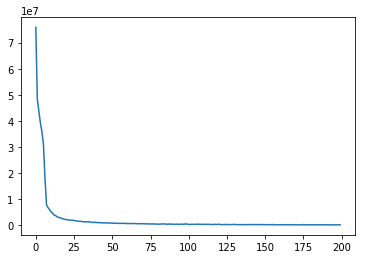

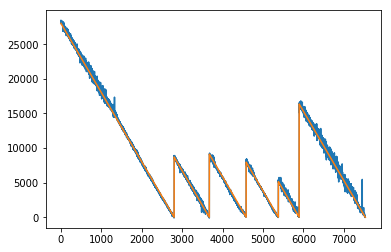

Epoch 1/500
7534/7534 [==============================] - 7s 943us/step - loss: 75988558.5750
Epoch 2/500
7534/7534 [==============================] - 7s 890us/step - loss: 47985689.7829
Epoch 3/500
7534/7534 [==============================] - 7s 879us/step - loss: 42367064.2846
Epoch 4/500
7534/7534 [==============================] - 7s 873us/step - loss: 37985197.7138
Epoch 5/500
7534/7534 [==============================] - 6s 842us/step - loss: 34743008.3260
Epoch 6/500
7534/7534 [==============================] - 6s 855us/step - loss: 26924490.7093
Epoch 7/500
7534/7534 [==============================] - 6s 846us/step - loss: 12304935.3970
Epoch 8/500
7534/7534 [==============================] - 6s 853us/step - loss: 7715366.0560
Epoch 9/500
7534/7534 [==============================] - 6s 851us/step - loss: 6744335.9395
Epoch 10/500
7534/7534 [==============================] - 6s 859us/step - loss: 6244860.8113
Epoch 11/500
7534/7534 [==============================] - 6s 853us/step 

7534/7534 [==============================] - 7s 871us/step - loss: 770316.0005
Epoch 90/500
7534/7534 [==============================] - 7s 866us/step - loss: 783232.0403
Epoch 91/500
7534/7534 [==============================] - 7s 878us/step - loss: 652675.9074
Epoch 92/500
7534/7534 [==============================] - 7s 875us/step - loss: 650110.7660
Epoch 93/500
7534/7534 [==============================] - 7s 870us/step - loss: 706313.2734
Epoch 94/500
7534/7534 [==============================] - 7s 869us/step - loss: 659970.6098
Epoch 95/500
7534/7534 [==============================] - 7s 867us/step - loss: 699623.8836
Epoch 96/500
7534/7534 [==============================] - 7s 916us/step - loss: 630725.0685
Epoch 97/500
7534/7534 [==============================] - 7s 879us/step - loss: 646570.4355
Epoch 98/500
7534/7534 [==============================] - 7s 868us/step - loss: 648965.9732
Epoch 99/500
7534/7534 [==============================] - 7s 867us/step - loss: 677730.9644
E

7534/7534 [==============================] - 7s 882us/step - loss: 288019.1862
Epoch 178/500
7534/7534 [==============================] - 7s 868us/step - loss: 282888.6609
Epoch 179/500
7534/7534 [==============================] - 7s 866us/step - loss: 277129.4514
Epoch 180/500
7534/7534 [==============================] - 7s 874us/step - loss: 317924.3435
Epoch 181/500
7534/7534 [==============================] - 6s 863us/step - loss: 342494.2151
Epoch 182/500
7534/7534 [==============================] - 7s 869us/step - loss: 283609.2519
Epoch 183/500
7534/7534 [==============================] - 7s 863us/step - loss: 271203.9740
Epoch 184/500
7534/7534 [==============================] - 7s 869us/step - loss: 253670.7629
Epoch 185/500
7534/7534 [==============================] - 7s 869us/step - loss: 276438.5577
Epoch 186/500
7534/7534 [==============================] - 7s 877us/step - loss: 266830.7522
Epoch 187/500
7534/7534 [==============================] - 6s 862us/step - loss: 254

7534/7534 [==============================] - 6s 860us/step - loss: 166104.3315
Epoch 266/500
7534/7534 [==============================] - 6s 862us/step - loss: 165531.0189
Epoch 267/500
7534/7534 [==============================] - 7s 874us/step - loss: 193479.8088
Epoch 268/500
7534/7534 [==============================] - 7s 885us/step - loss: 164468.0709
Epoch 269/500
7534/7534 [==============================] - 7s 863us/step - loss: 195617.8263
Epoch 270/500
7534/7534 [==============================] - 7s 865us/step - loss: 133563.4926
Epoch 271/500
7534/7534 [==============================] - 6s 862us/step - loss: 161301.5429
Epoch 272/500
7534/7534 [==============================] - 6s 859us/step - loss: 189963.9675
Epoch 273/500
7534/7534 [==============================] - 7s 871us/step - loss: 193549.1028
Epoch 274/500
7534/7534 [==============================] - 6s 860us/step - loss: 168323.3537
Epoch 275/500
7534/7534 [==============================] - 7s 864us/step - loss: 185

7534/7534 [==============================] - 6s 862us/step - loss: 115905.5090
Epoch 354/500
7534/7534 [==============================] - 6s 862us/step - loss: 105746.3012
Epoch 355/500
7534/7534 [==============================] - 6s 856us/step - loss: 103563.5624
Epoch 356/500
7534/7534 [==============================] - 7s 868us/step - loss: 118347.6003
Epoch 357/500
7534/7534 [==============================] - 6s 859us/step - loss: 122745.3191
Epoch 358/500
7534/7534 [==============================] - 6s 856us/step - loss: 95165.8755
Epoch 359/500
7534/7534 [==============================] - 7s 876us/step - loss: 122248.2652
Epoch 360/500
7534/7534 [==============================] - 7s 887us/step - loss: 126314.4007
Epoch 361/500
7534/7534 [==============================] - 6s 861us/step - loss: 88731.0941
Epoch 362/500
7534/7534 [==============================] - 6s 860us/step - loss: 125125.3862
Epoch 363/500
7534/7534 [==============================] - 6s 861us/step - loss: 99127

7534/7534 [==============================] - 6s 862us/step - loss: 75017.1428
Epoch 442/500
7534/7534 [==============================] - 6s 854us/step - loss: 123938.5702
Epoch 443/500
7534/7534 [==============================] - 6s 853us/step - loss: 64876.6693
Epoch 444/500
7534/7534 [==============================] - 6s 857us/step - loss: 79654.5871
Epoch 445/500
7534/7534 [==============================] - 6s 862us/step - loss: 61178.0052
Epoch 446/500
7534/7534 [==============================] - 7s 978us/step - loss: 56207.7769
Epoch 447/500
7534/7534 [==============================] - 7s 967us/step - loss: 70198.9456
Epoch 448/500
7534/7534 [==============================] - 7s 950us/step - loss: 67175.4258
Epoch 449/500
7534/7534 [==============================] - 7s 930us/step - loss: 120153.0096
Epoch 450/500
7534/7534 [==============================] - 7s 866us/step - loss: 66964.3101
Epoch 451/500
7534/7534 [==============================] - 7s 872us/step - loss: 79888.5797


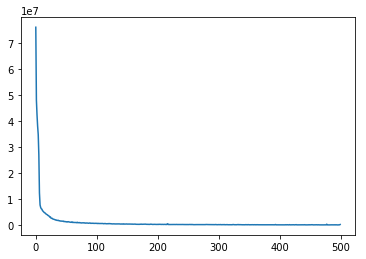

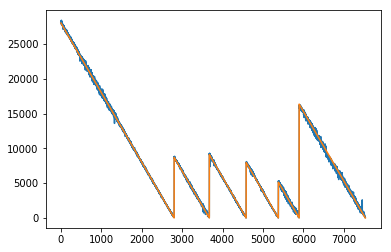

In [6]:
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

## test modellen

##################
# Test: 1_3
##################
1802/1802 [==============================] - 0s 203us/step


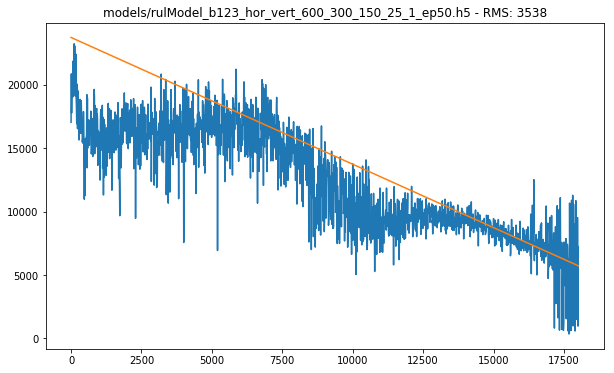

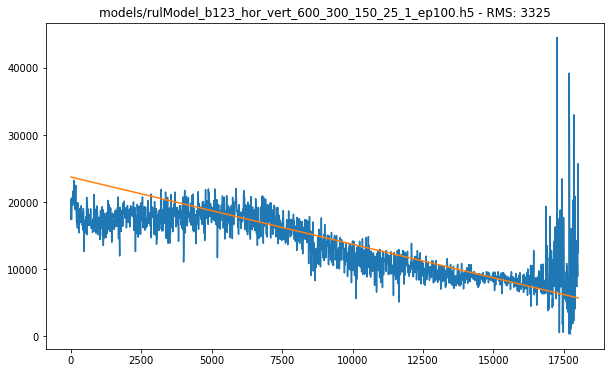

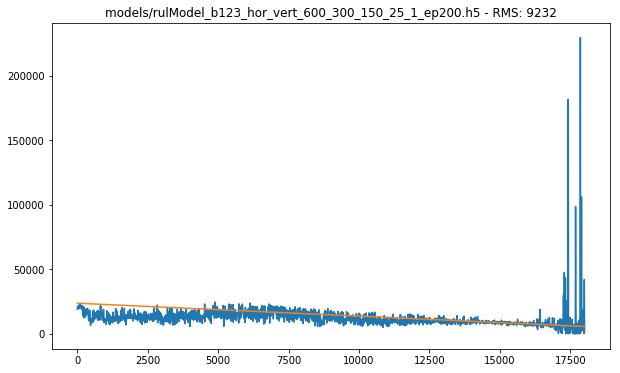

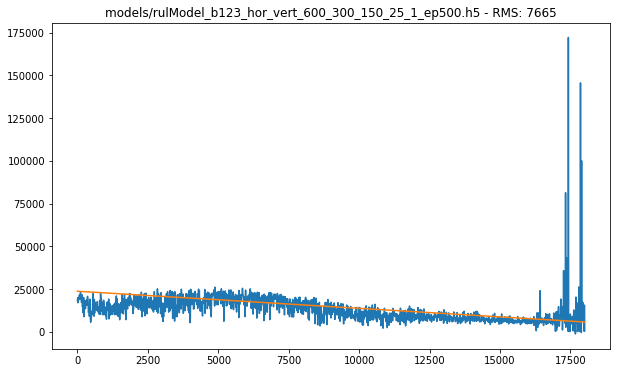

##################
# Test: 1_4
##################
1139/1139 [==============================] - 0s 291us/step


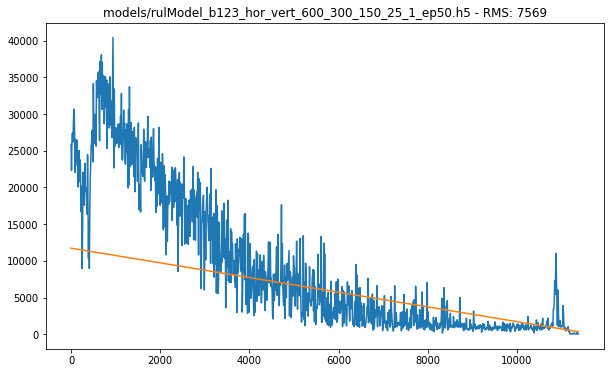

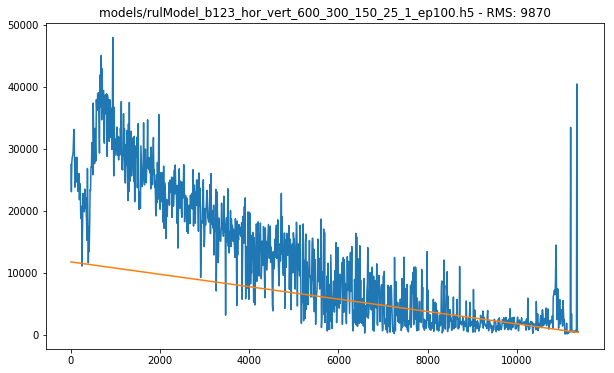

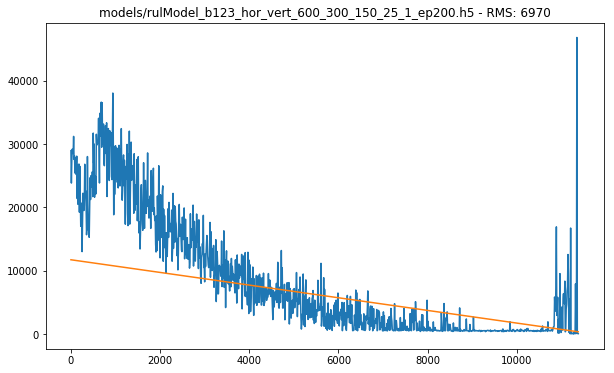

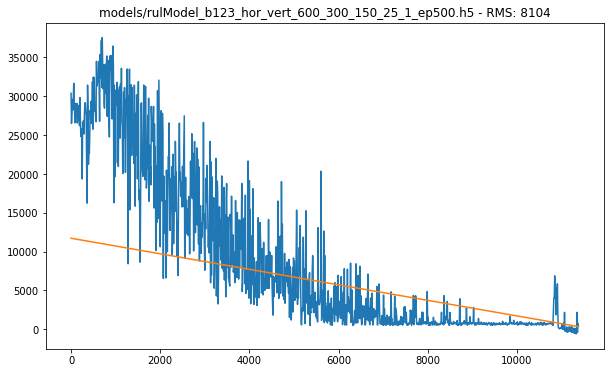

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 252us/step


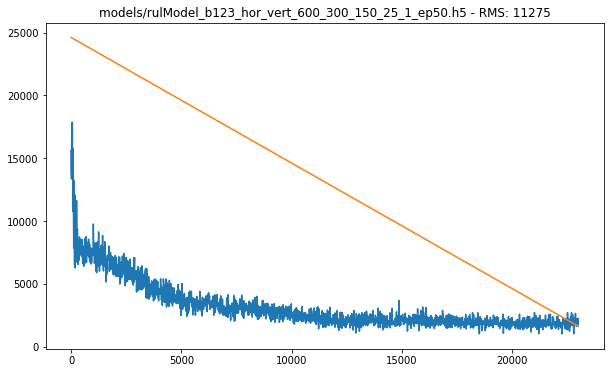

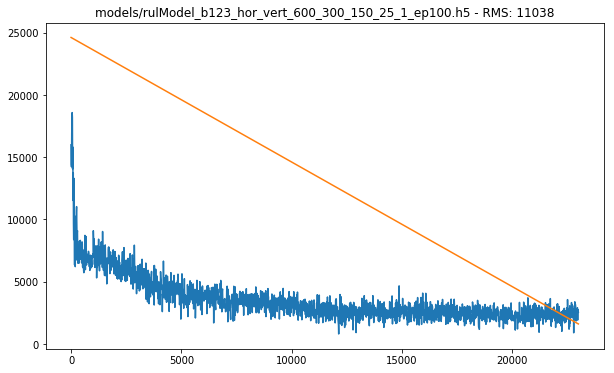

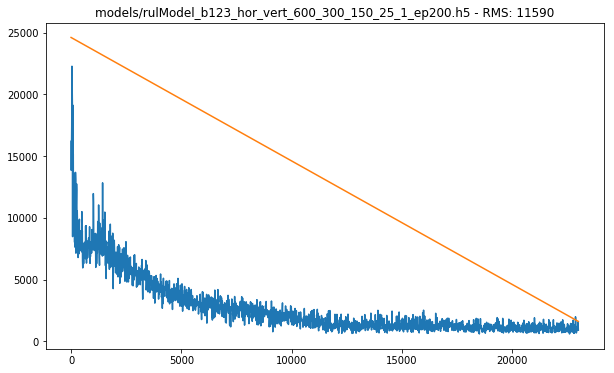

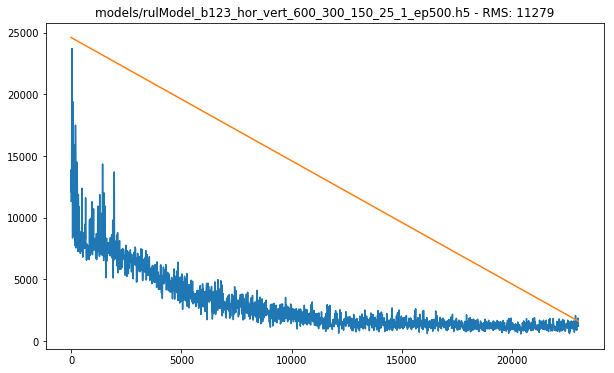

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 299us/step


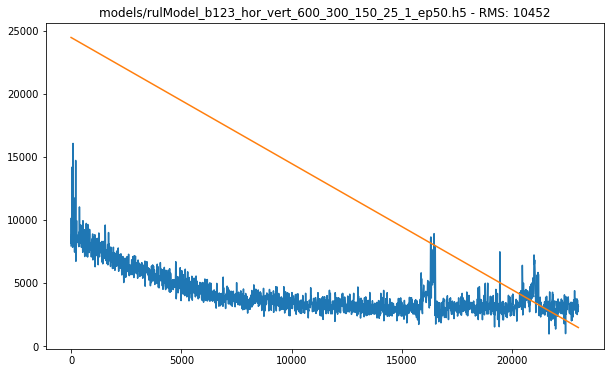

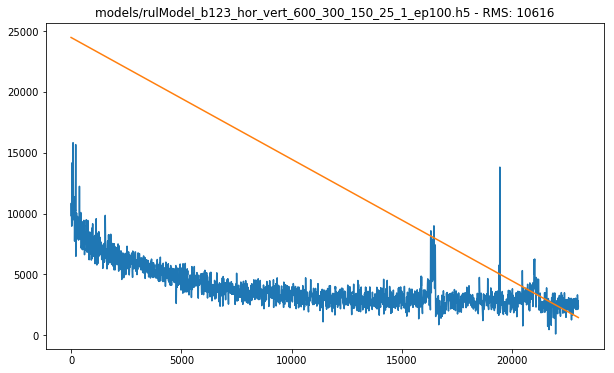

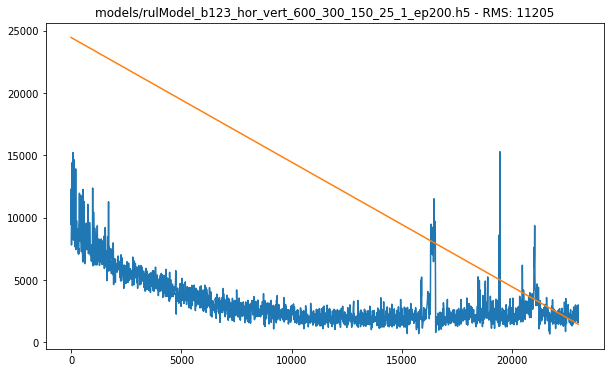

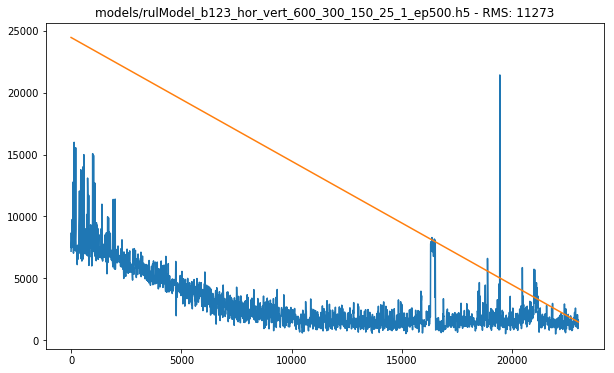

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 425us/step


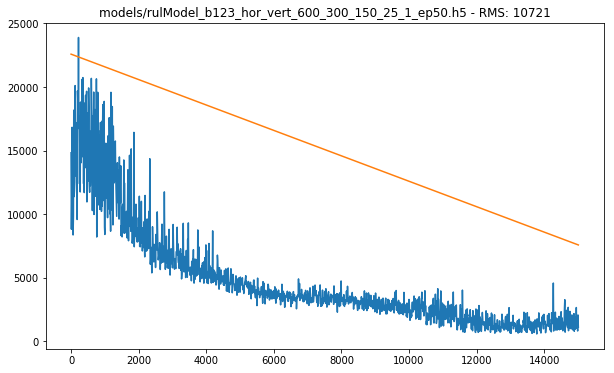

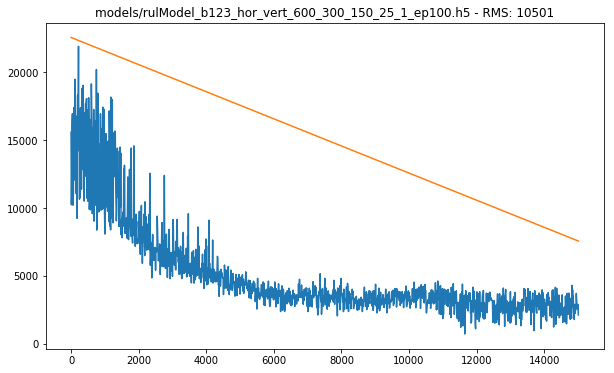

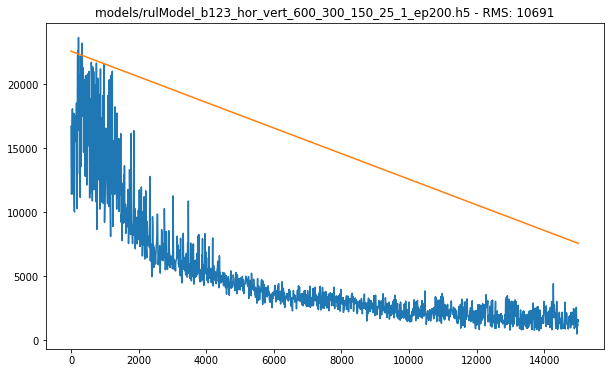

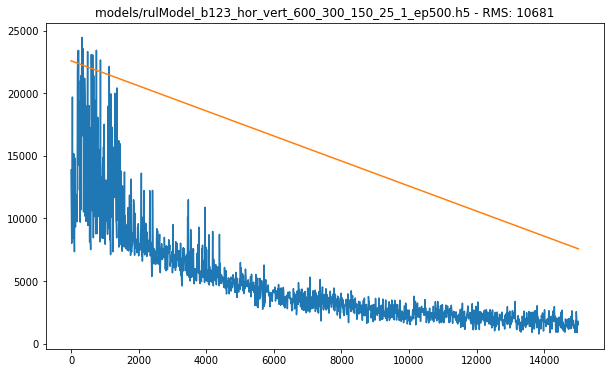

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 564us/step


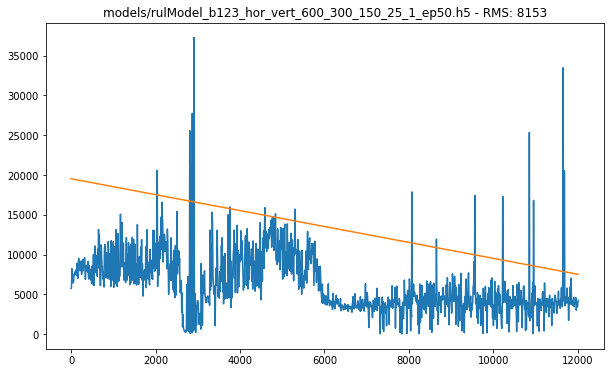

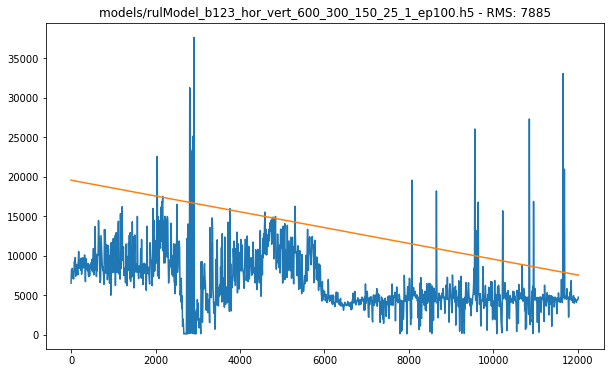

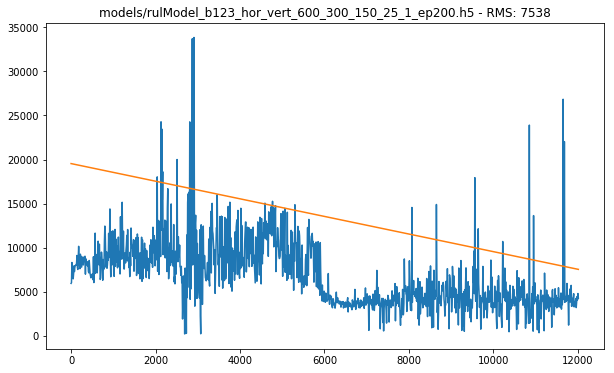

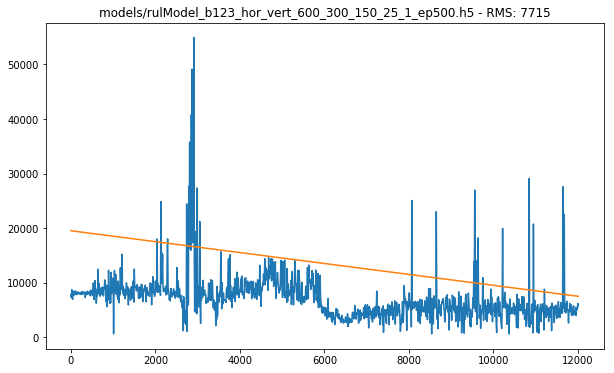

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 1ms/step


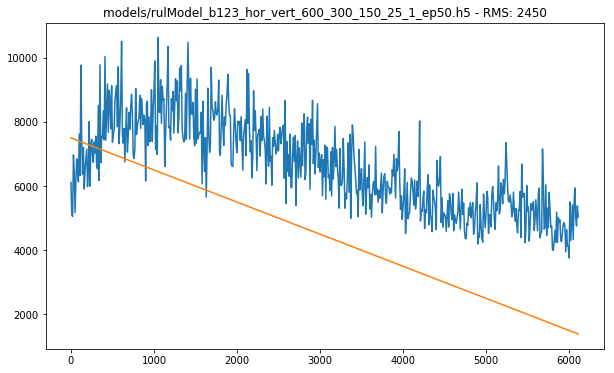

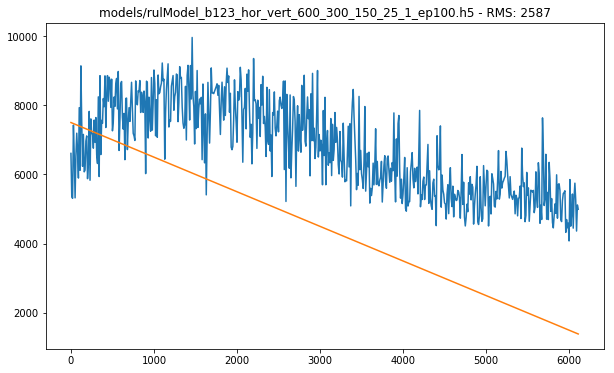

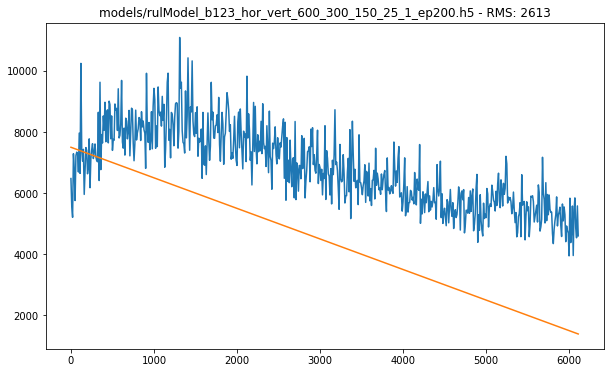

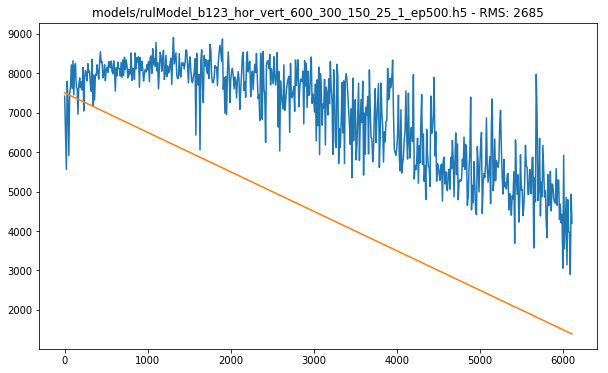

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 463us/step


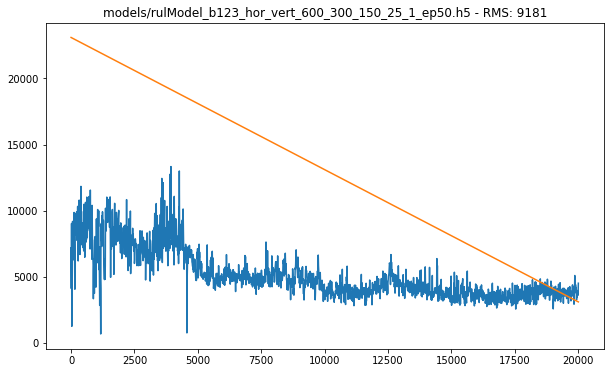

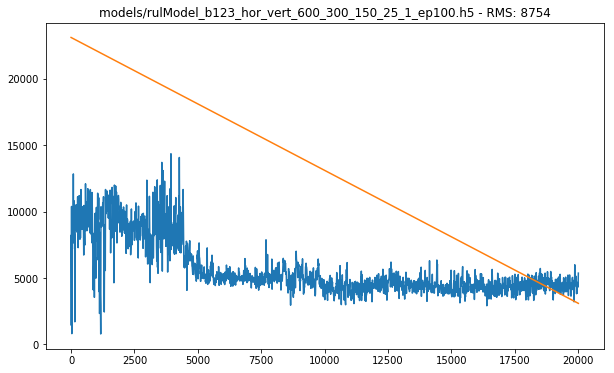

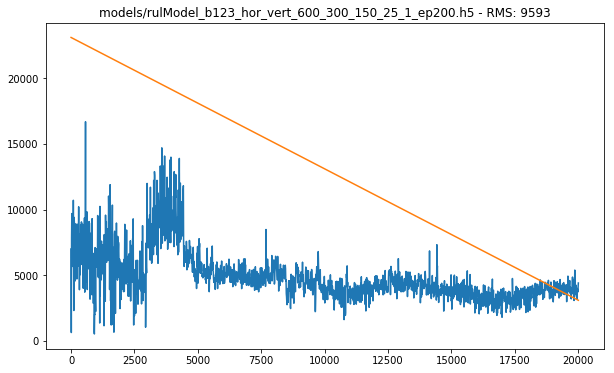

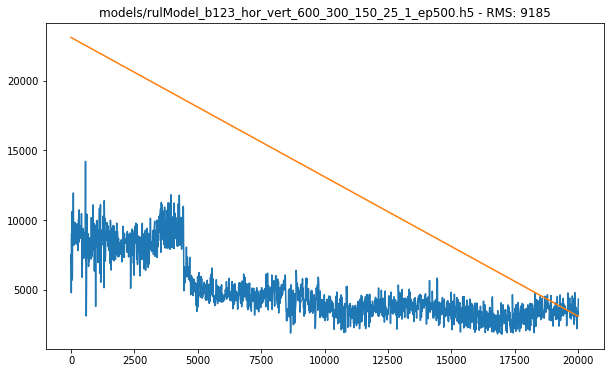

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 1ms/step


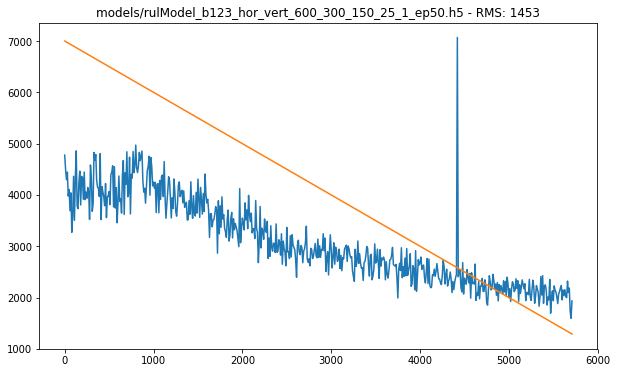

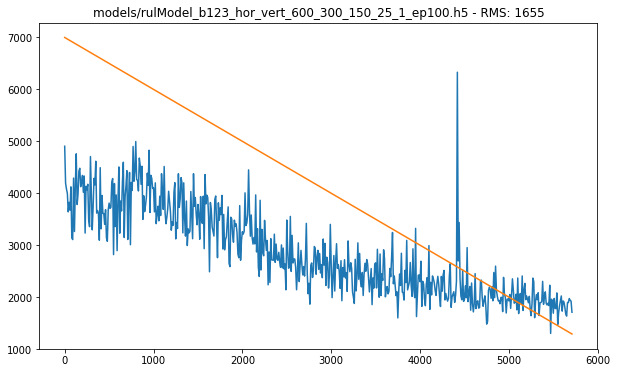

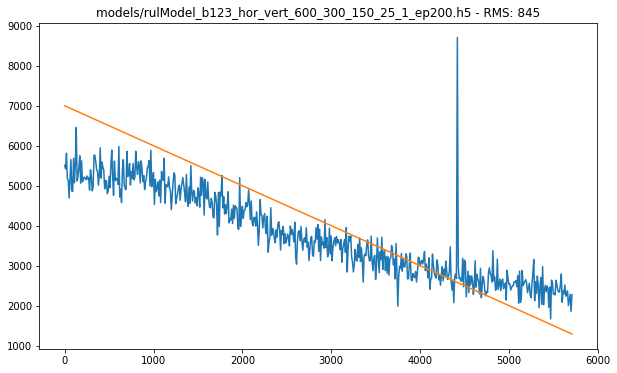

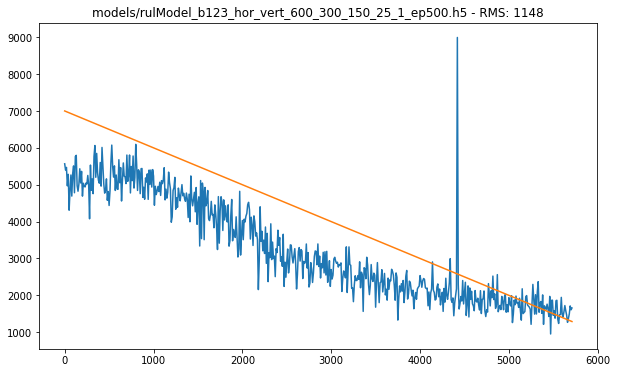

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 5ms/step


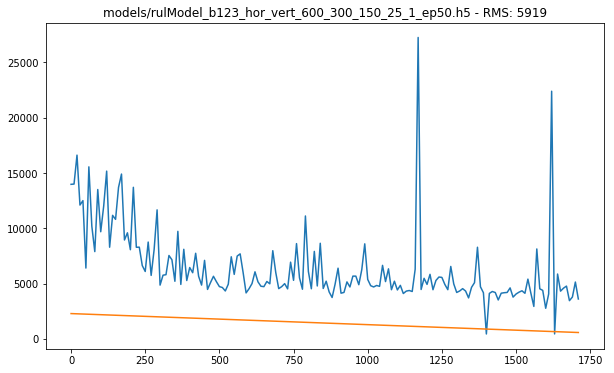

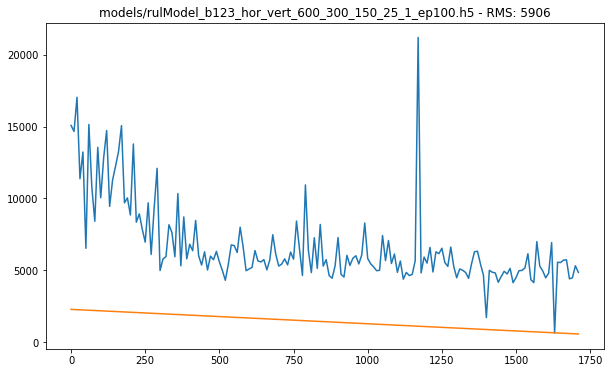

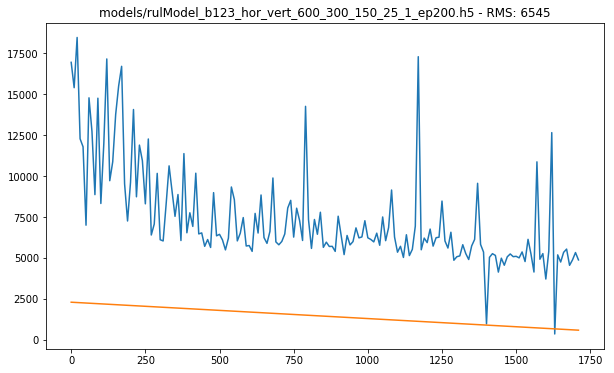

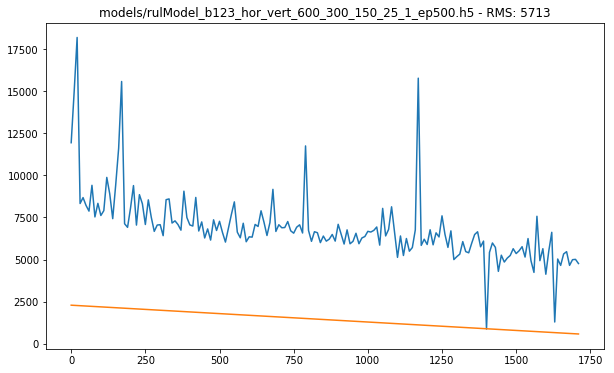

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 3ms/step


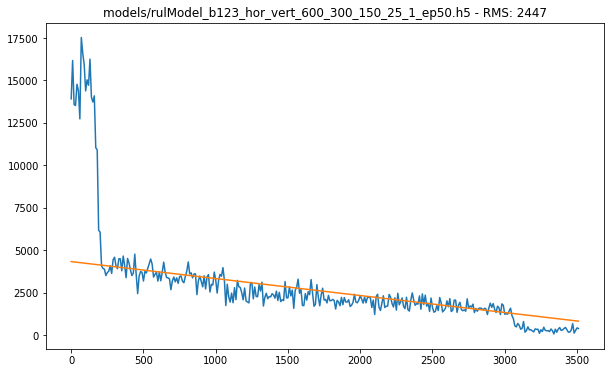

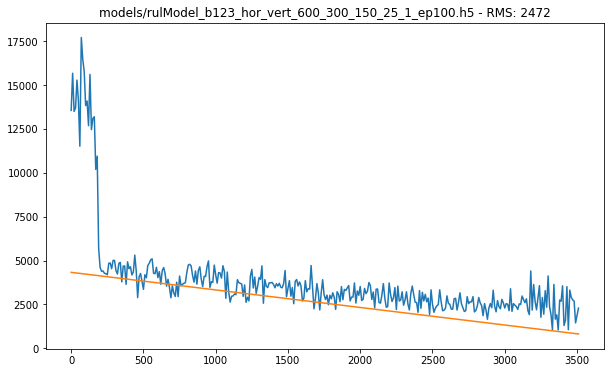

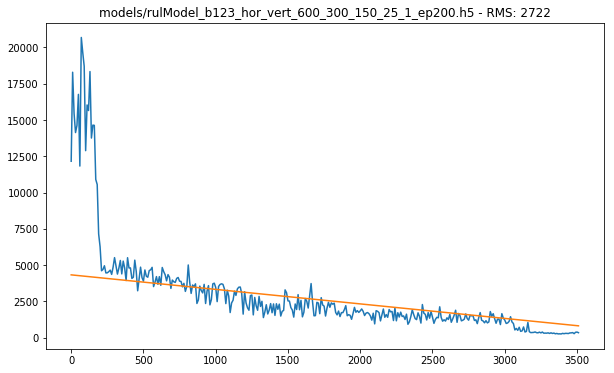

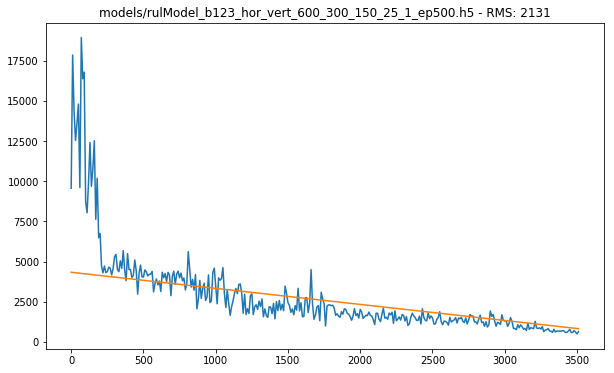

In [7]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

# Train met andere layers

Epoch 1/50
7534/7534 [==============================] - 12s 2ms/step - loss: 122606193.3740
Epoch 2/50
7534/7534 [==============================] - 5s 724us/step - loss: 86592918.8819
Epoch 3/50
7534/7534 [==============================] - 5s 725us/step - loss: 55300770.6090
Epoch 4/50
7534/7534 [==============================] - 5s 727us/step - loss: 51990600.5978
Epoch 5/50
7534/7534 [==============================] - 5s 727us/step - loss: 50822625.2795
Epoch 6/50
7534/7534 [==============================] - 6s 738us/step - loss: 49867693.2275
Epoch 7/50
7534/7534 [==============================] - 6s 800us/step - loss: 49031442.6207
Epoch 8/50
7534/7534 [==============================] - 6s 776us/step - loss: 48245315.1909
Epoch 9/50
7534/7534 [==============================] - 6s 754us/step - loss: 47543026.4189
Epoch 10/50
7534/7534 [==============================] - 6s 742us/step - loss: 46846338.2363
Epoch 11/50
7534/7534 [==============================] - 6s 746us/step - loss: 

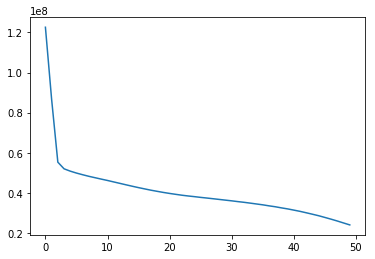

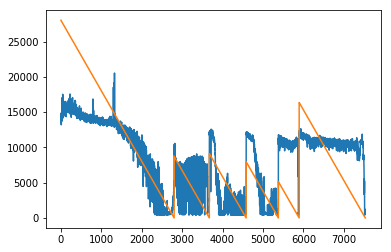

Epoch 1/100
7534/7534 [==============================] - 10s 1ms/step - loss: 122574822.1524
Epoch 2/100
7534/7534 [==============================] - 5s 725us/step - loss: 86148426.8766
Epoch 3/100
7534/7534 [==============================] - 6s 739us/step - loss: 54986275.4627
Epoch 4/100
7534/7534 [==============================] - 6s 737us/step - loss: 51748890.4975
Epoch 5/100
7534/7534 [==============================] - 6s 737us/step - loss: 50591034.4715
Epoch 6/100
7534/7534 [==============================] - 6s 755us/step - loss: 49668598.1577
Epoch 7/100
7534/7534 [==============================] - 6s 766us/step - loss: 48844822.4274
Epoch 8/100
7534/7534 [==============================] - 6s 741us/step - loss: 48093053.3125
Epoch 9/100
7534/7534 [==============================] - 6s 734us/step - loss: 47390392.5649
Epoch 10/100
7534/7534 [==============================] - 6s 827us/step - loss: 46653979.5986
Epoch 11/100
7534/7534 [==============================] - 6s 806us/st

7534/7534 [==============================] - 4s 465us/step - loss: 7676954.1670
Epoch 89/100
7534/7534 [==============================] - 4s 475us/step - loss: 7591215.4233
Epoch 90/100
7534/7534 [==============================] - 4s 470us/step - loss: 7497660.1605
Epoch 91/100
7534/7534 [==============================] - 4s 465us/step - loss: 7410077.3548
Epoch 92/100
7534/7534 [==============================] - 4s 471us/step - loss: 7333203.5251
Epoch 93/100
7534/7534 [==============================] - 4s 483us/step - loss: 7247880.8460
Epoch 94/100
7534/7534 [==============================] - 4s 477us/step - loss: 7165374.1899
Epoch 95/100
7534/7534 [==============================] - 4s 496us/step - loss: 7081722.3727
Epoch 96/100
7534/7534 [==============================] - 4s 477us/step - loss: 7027091.1561
Epoch 97/100
7534/7534 [==============================] - 4s 471us/step - loss: 6940900.1513
Epoch 98/100
7534/7534 [==============================] - 3s 464us/step - loss: 686

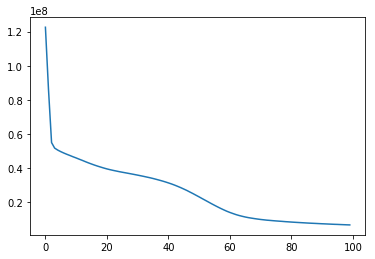

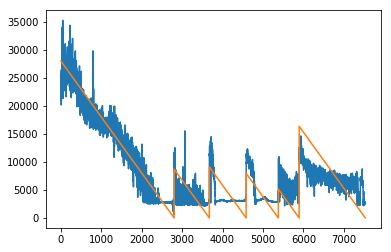

Epoch 1/200
7534/7534 [==============================] - 7s 872us/step - loss: 122728238.3032
Epoch 2/200
7534/7534 [==============================] - 4s 527us/step - loss: 87215407.8620
Epoch 3/200
7534/7534 [==============================] - 4s 489us/step - loss: 55490176.8410
Epoch 4/200
7534/7534 [==============================] - 4s 479us/step - loss: 52006446.3201
Epoch 5/200
7534/7534 [==============================] - 4s 484us/step - loss: 50856543.4855
Epoch 6/200
7534/7534 [==============================] - 4s 479us/step - loss: 49907428.5819
Epoch 7/200
7534/7534 [==============================] - 4s 472us/step - loss: 49079640.6244
Epoch 8/200
7534/7534 [==============================] - 4s 468us/step - loss: 48308870.7306
Epoch 9/200
7534/7534 [==============================] - 4s 479us/step - loss: 47612286.2925
Epoch 10/200
7534/7534 [==============================] - 4s 470us/step - loss: 46933497.0650
Epoch 11/200
7534/7534 [==============================] - 4s 467us/s

7534/7534 [==============================] - 4s 467us/step - loss: 8405744.6403
Epoch 89/200
7534/7534 [==============================] - 4s 467us/step - loss: 8298192.6739
Epoch 90/200
7534/7534 [==============================] - 4s 466us/step - loss: 8173886.0600
Epoch 91/200
7534/7534 [==============================] - 4s 483us/step - loss: 8041071.0567
Epoch 92/200
7534/7534 [==============================] - 4s 487us/step - loss: 7942135.0528
Epoch 93/200
7534/7534 [==============================] - 4s 501us/step - loss: 7819722.4308
Epoch 94/200
7534/7534 [==============================] - 4s 488us/step - loss: 7746273.3257
Epoch 95/200
7534/7534 [==============================] - 4s 479us/step - loss: 7608078.3574
Epoch 96/200
7534/7534 [==============================] - 4s 467us/step - loss: 7495568.3252
Epoch 97/200
7534/7534 [==============================] - 4s 471us/step - loss: 7379652.3706
Epoch 98/200
7534/7534 [==============================] - 4s 469us/step - loss: 725

7534/7534 [==============================] - 4s 472us/step - loss: 3526573.9610
Epoch 176/200
7534/7534 [==============================] - 4s 469us/step - loss: 3502203.2586
Epoch 177/200
7534/7534 [==============================] - 4s 469us/step - loss: 3476982.5285
Epoch 178/200
7534/7534 [==============================] - 4s 468us/step - loss: 3447588.5265
Epoch 179/200
7534/7534 [==============================] - 4s 474us/step - loss: 3418927.7425
Epoch 180/200
7534/7534 [==============================] - 4s 466us/step - loss: 3420435.8334
Epoch 181/200
7534/7534 [==============================] - 4s 468us/step - loss: 3382452.5424
Epoch 182/200
7534/7534 [==============================] - 4s 474us/step - loss: 3358184.9048
Epoch 183/200
7534/7534 [==============================] - 4s 465us/step - loss: 3329004.9131
Epoch 184/200
7534/7534 [==============================] - 4s 472us/step - loss: 3303911.6572
Epoch 185/200
7534/7534 [==============================] - 4s 467us/step -

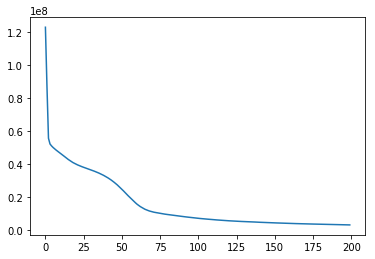

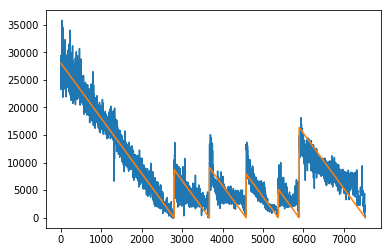

Epoch 1/500
7534/7534 [==============================] - 7s 885us/step - loss: 122344533.9007
Epoch 2/500
7534/7534 [==============================] - 4s 548us/step - loss: 83847383.7314
Epoch 3/500
7534/7534 [==============================] - 4s 495us/step - loss: 54515549.4930
Epoch 4/500
7534/7534 [==============================] - 4s 502us/step - loss: 51862832.7412
Epoch 5/500
7534/7534 [==============================] - 4s 496us/step - loss: 50693963.5853
Epoch 6/500
7534/7534 [==============================] - 4s 478us/step - loss: 49742814.5718
Epoch 7/500
7534/7534 [==============================] - 4s 481us/step - loss: 48902424.5309
Epoch 8/500
7534/7534 [==============================] - 4s 479us/step - loss: 48146594.1258
Epoch 9/500
7534/7534 [==============================] - 4s 477us/step - loss: 47454758.8973
Epoch 10/500
7534/7534 [==============================] - 4s 481us/step - loss: 46753081.9262
Epoch 11/500
7534/7534 [==============================] - 4s 480us/s

7534/7534 [==============================] - 4s 480us/step - loss: 6524335.1049
Epoch 89/500
7534/7534 [==============================] - 4s 505us/step - loss: 6444875.8918
Epoch 90/500
7534/7534 [==============================] - 4s 505us/step - loss: 6390435.6297
Epoch 91/500
7534/7534 [==============================] - 4s 505us/step - loss: 6317730.6100
Epoch 92/500
7534/7534 [==============================] - 4s 494us/step - loss: 6220148.5499
Epoch 93/500
7534/7534 [==============================] - 4s 474us/step - loss: 6153896.7745
Epoch 94/500
7534/7534 [==============================] - 4s 481us/step - loss: 6070547.7905
Epoch 95/500
7534/7534 [==============================] - 4s 485us/step - loss: 6024698.6670
Epoch 96/500
7534/7534 [==============================] - 4s 478us/step - loss: 5941443.3046
Epoch 97/500
7534/7534 [==============================] - 4s 488us/step - loss: 5876554.3902
Epoch 98/500
7534/7534 [==============================] - 4s 481us/step - loss: 585

7534/7534 [==============================] - 4s 483us/step - loss: 2749440.1779
Epoch 176/500
7534/7534 [==============================] - 4s 478us/step - loss: 2736166.4516
Epoch 177/500
7534/7534 [==============================] - 4s 483us/step - loss: 2714801.8042
Epoch 178/500
7534/7534 [==============================] - 4s 478us/step - loss: 2686481.5409
Epoch 179/500
7534/7534 [==============================] - 4s 478us/step - loss: 2658280.5086
Epoch 180/500
7534/7534 [==============================] - 4s 493us/step - loss: 2634547.7282
Epoch 181/500
7534/7534 [==============================] - 4s 484us/step - loss: 2622178.3535
Epoch 182/500
7534/7534 [==============================] - 4s 482us/step - loss: 2599664.4684
Epoch 183/500
7534/7534 [==============================] - 4s 484us/step - loss: 2576050.2620
Epoch 184/500
7534/7534 [==============================] - 4s 502us/step - loss: 2567714.0021
Epoch 185/500
7534/7534 [==============================] - 4s 482us/step -

7534/7534 [==============================] - 4s 475us/step - loss: 1443675.9659
Epoch 263/500
7534/7534 [==============================] - 4s 483us/step - loss: 1449730.9912
Epoch 264/500
7534/7534 [==============================] - 4s 476us/step - loss: 1433798.1213
Epoch 265/500
7534/7534 [==============================] - 4s 524us/step - loss: 1423072.2072
Epoch 266/500
7534/7534 [==============================] - 4s 482us/step - loss: 1411054.6435
Epoch 267/500
7534/7534 [==============================] - 4s 477us/step - loss: 1397052.6083
Epoch 268/500
7534/7534 [==============================] - 4s 482us/step - loss: 1378981.3681
Epoch 269/500
7534/7534 [==============================] - 4s 486us/step - loss: 1391251.6962
Epoch 270/500
7534/7534 [==============================] - 4s 476us/step - loss: 1371100.8834
Epoch 271/500
7534/7534 [==============================] - 4s 483us/step - loss: 1363205.7303
Epoch 272/500
7534/7534 [==============================] - 4s 510us/step -

7534/7534 [==============================] - 4s 482us/step - loss: 862723.7227
Epoch 350/500
7534/7534 [==============================] - 4s 478us/step - loss: 865021.0063
Epoch 351/500
7534/7534 [==============================] - 4s 500us/step - loss: 855887.3120
Epoch 352/500
7534/7534 [==============================] - 4s 495us/step - loss: 847467.8676
Epoch 353/500
7534/7534 [==============================] - 4s 507us/step - loss: 847101.3709
Epoch 354/500
7534/7534 [==============================] - 4s 496us/step - loss: 841278.6046
Epoch 355/500
7534/7534 [==============================] - 4s 483us/step - loss: 846949.9257
Epoch 356/500
7534/7534 [==============================] - 4s 478us/step - loss: 834509.1227
Epoch 357/500
7534/7534 [==============================] - 4s 480us/step - loss: 826368.6129
Epoch 358/500
7534/7534 [==============================] - 4s 482us/step - loss: 834725.2926
Epoch 359/500
7534/7534 [==============================] - 4s 479us/step - loss: 825

7534/7534 [==============================] - 4s 478us/step - loss: 587626.1669
Epoch 438/500
7534/7534 [==============================] - 4s 479us/step - loss: 579763.6233
Epoch 439/500
7534/7534 [==============================] - 4s 488us/step - loss: 576242.0389
Epoch 440/500
7534/7534 [==============================] - 4s 479us/step - loss: 577431.7990
Epoch 441/500
7534/7534 [==============================] - 4s 480us/step - loss: 570218.0986
Epoch 442/500
7534/7534 [==============================] - 4s 482us/step - loss: 577574.2636
Epoch 443/500
7534/7534 [==============================] - 4s 478us/step - loss: 569601.5892
Epoch 444/500
7534/7534 [==============================] - 4s 479us/step - loss: 563226.4906
Epoch 445/500
7534/7534 [==============================] - 4s 479us/step - loss: 573089.6508
Epoch 446/500
7534/7534 [==============================] - 4s 482us/step - loss: 561953.2794
Epoch 447/500
7534/7534 [==============================] - 4s 482us/step - loss: 553

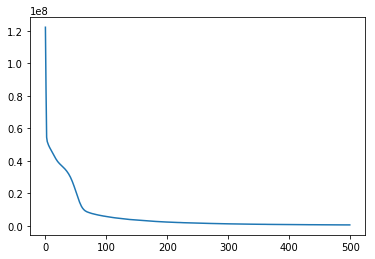

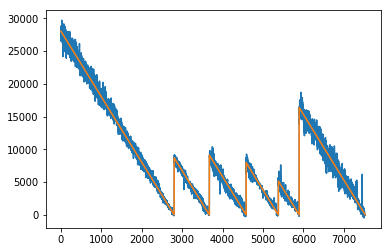

In [8]:
layersizes = [300,25]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 690us/step


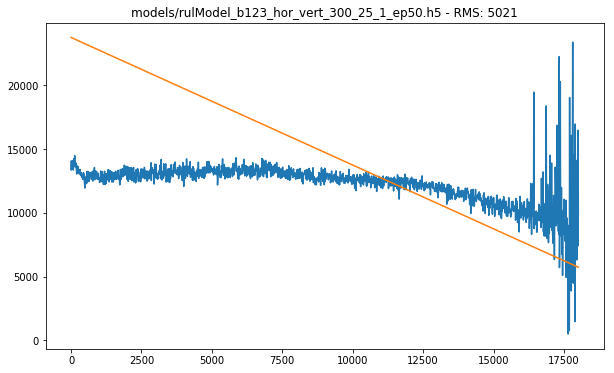

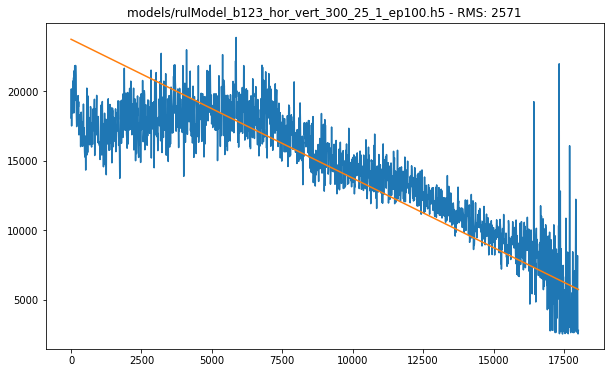

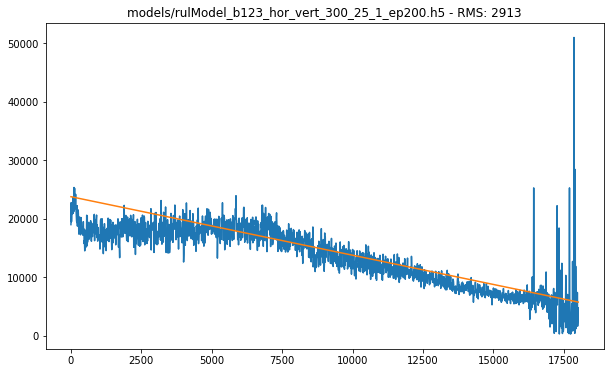

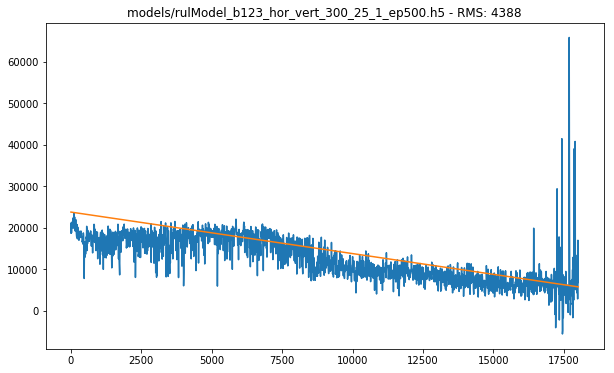

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 1ms/step


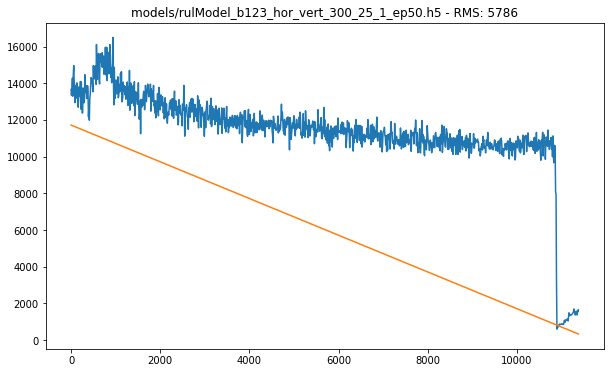

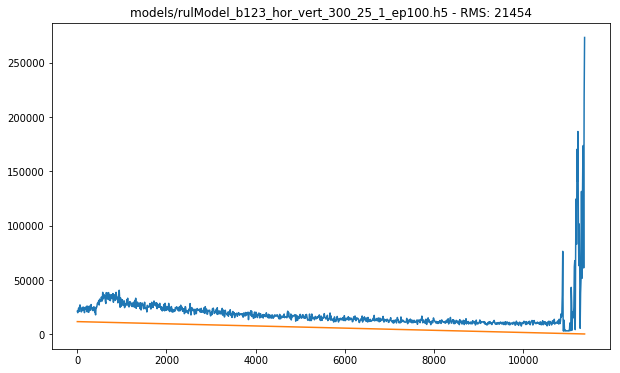

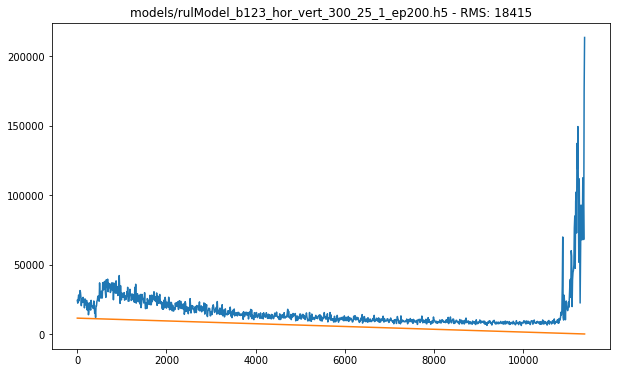

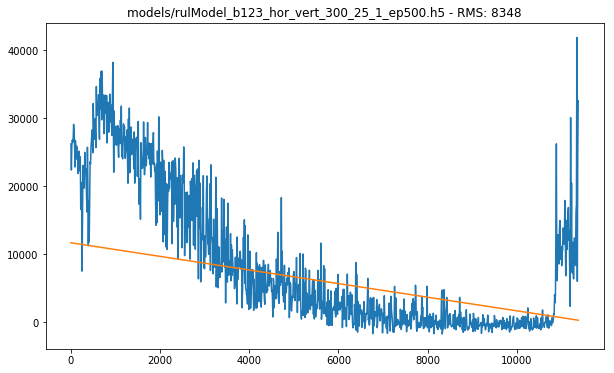

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 614us/step


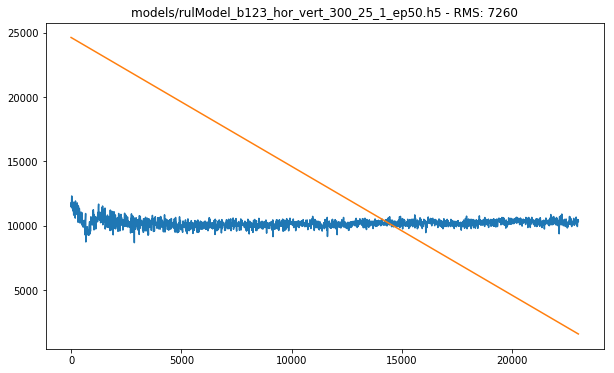

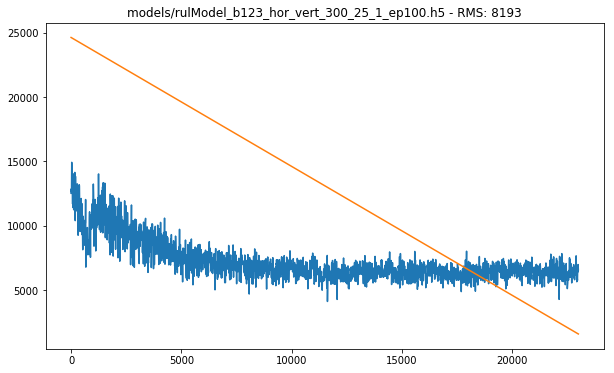

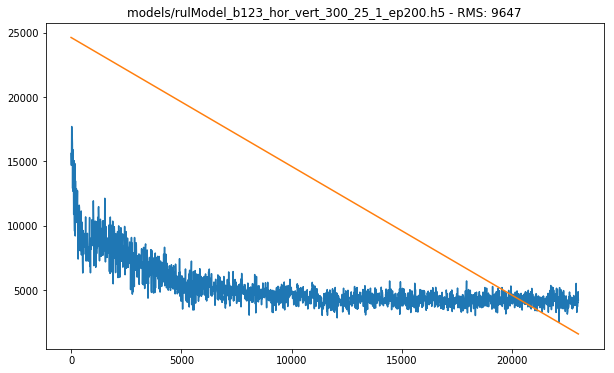

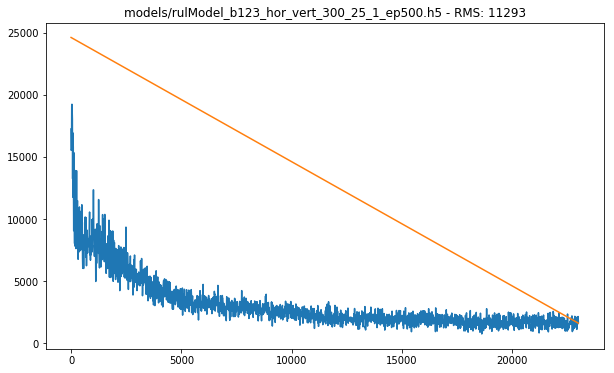

##################
# Test: 1_6
##################
2302/2302 [==============================] - 2s 668us/step


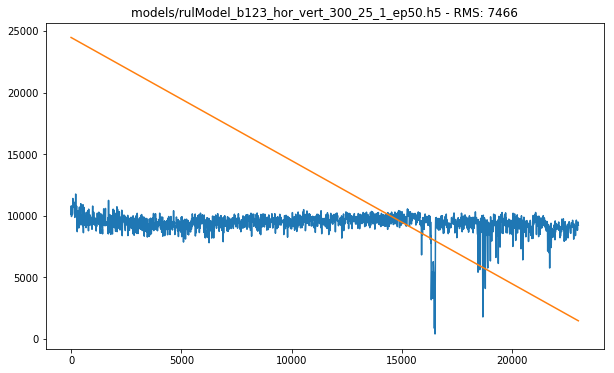

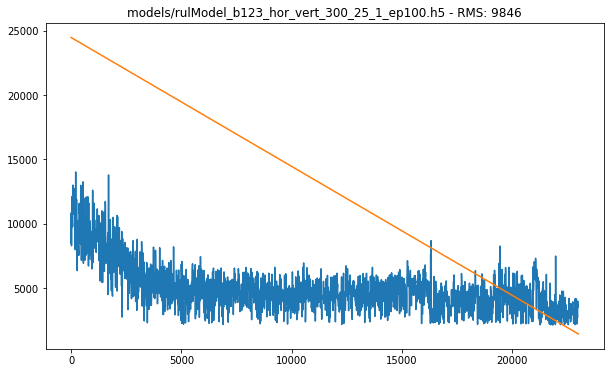

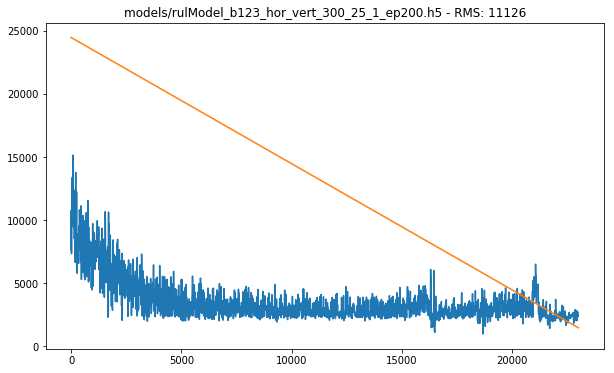

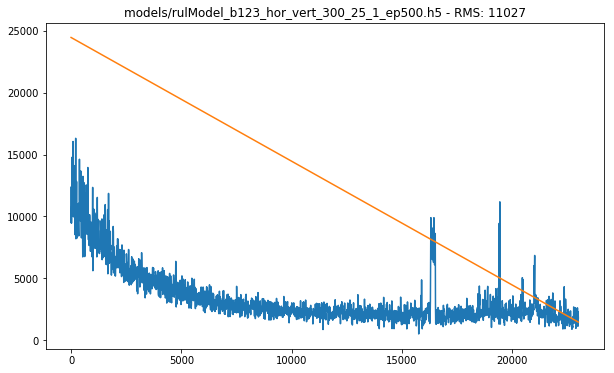

##################
# Test: 1_7
##################
1502/1502 [==============================] - 2s 1ms/step


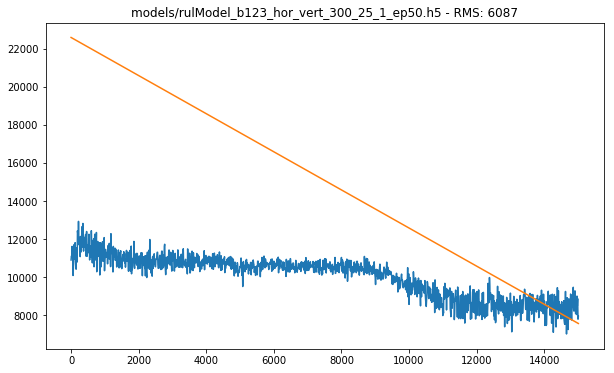

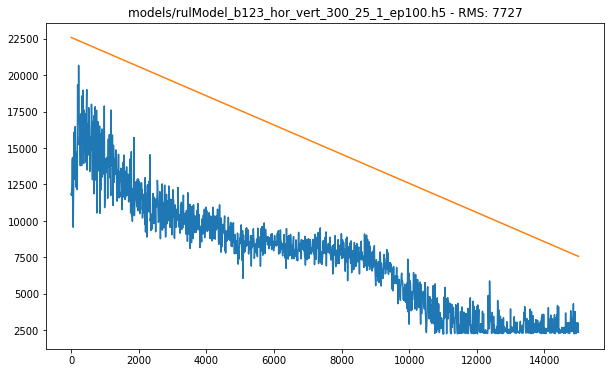

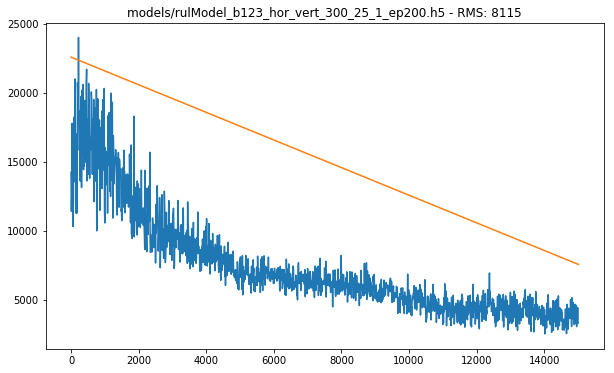

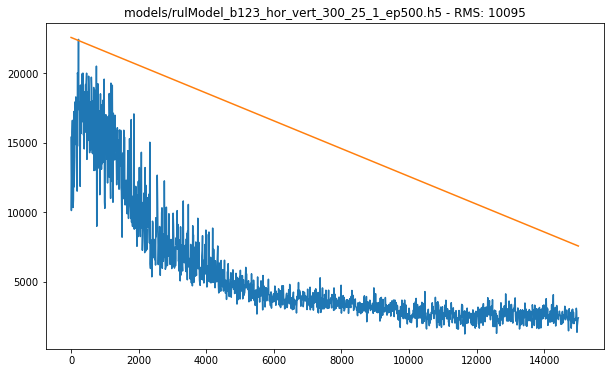

##################
# Test: 2_3
##################
1202/1202 [==============================] - 2s 1ms/step


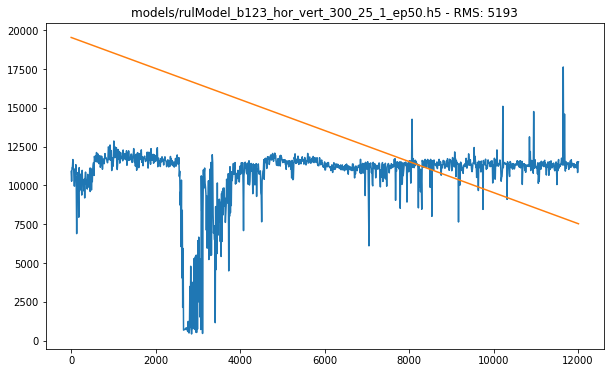

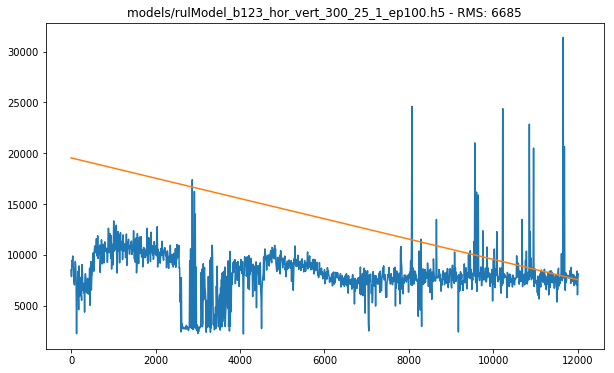

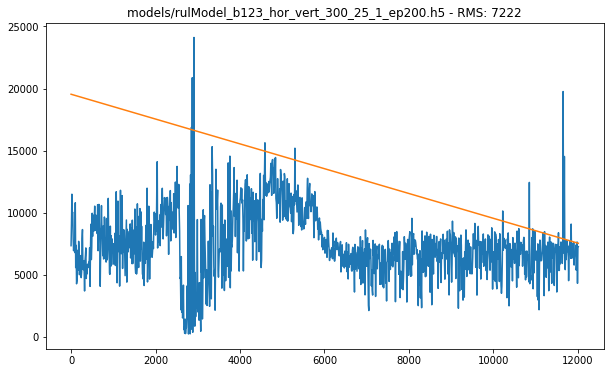

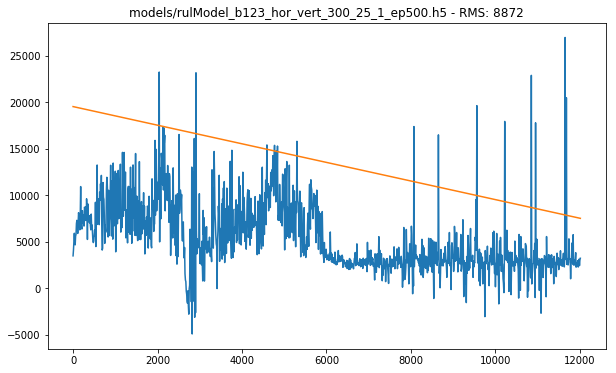

##################
# Test: 2_4
##################
612/612 [==============================] - 2s 3ms/step


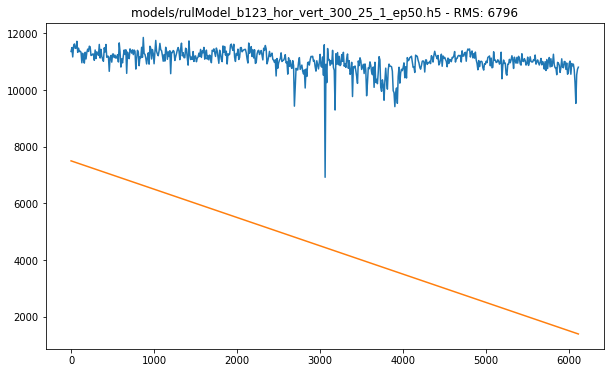

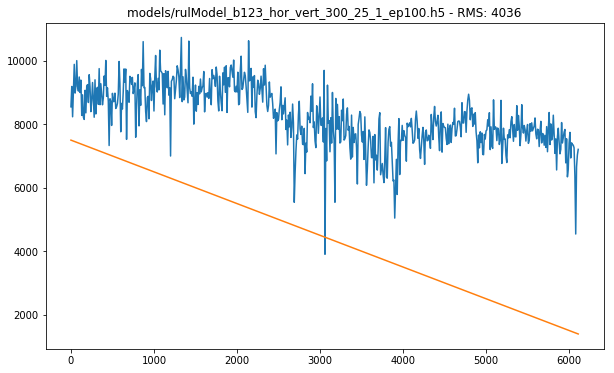

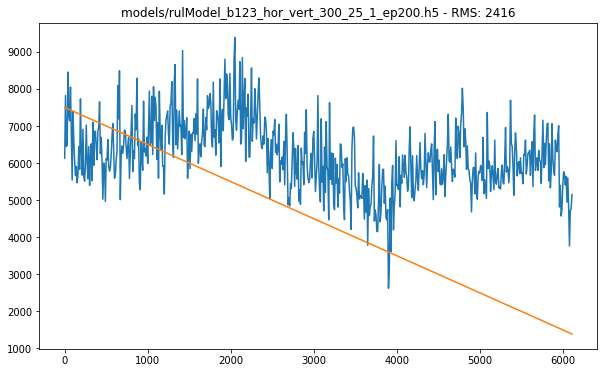

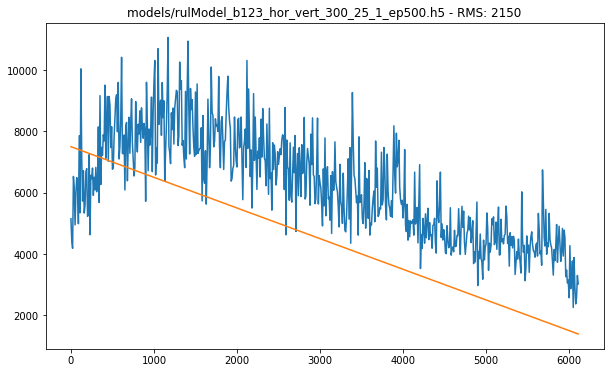

##################
# Test: 2_5
##################
2002/2002 [==============================] - 2s 893us/step


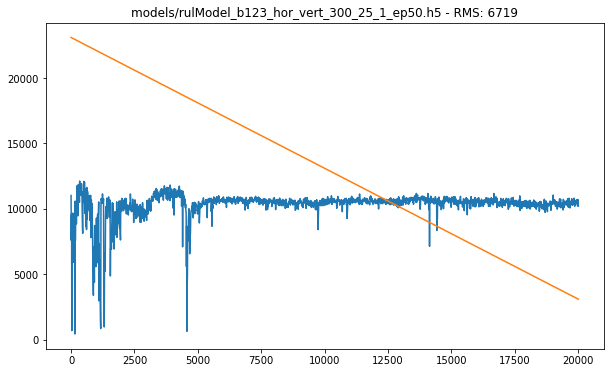

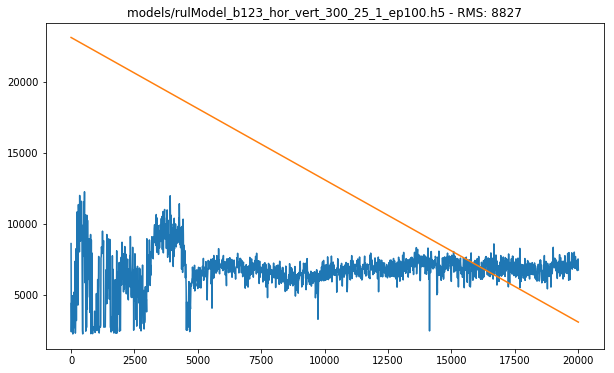

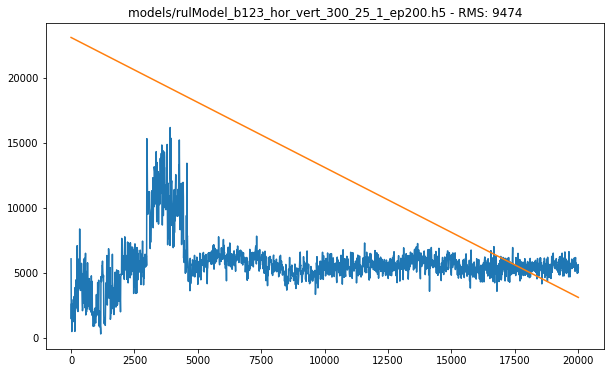

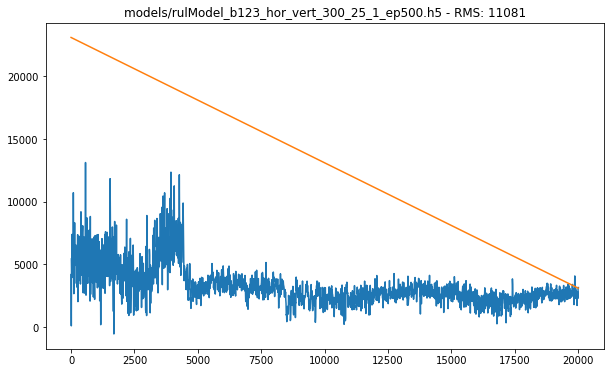

##################
# Test: 2_6
##################
572/572 [==============================] - 2s 3ms/step


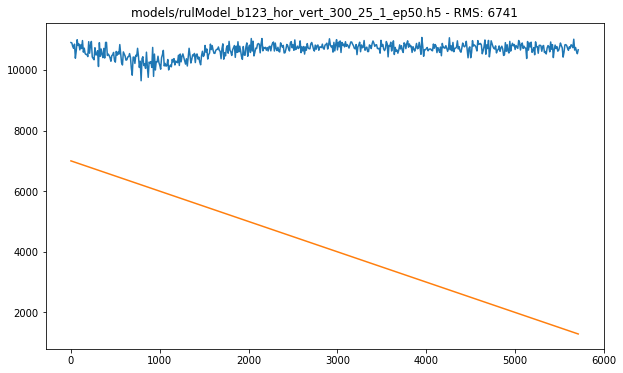

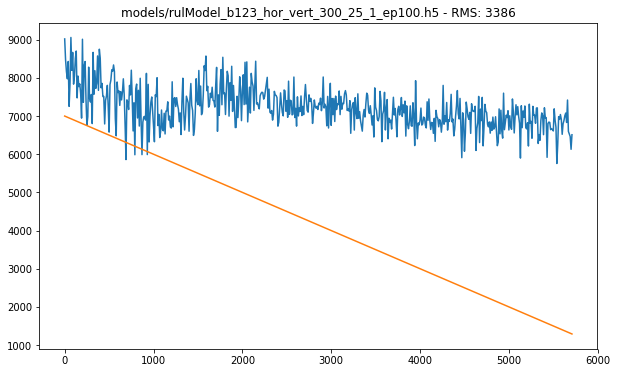

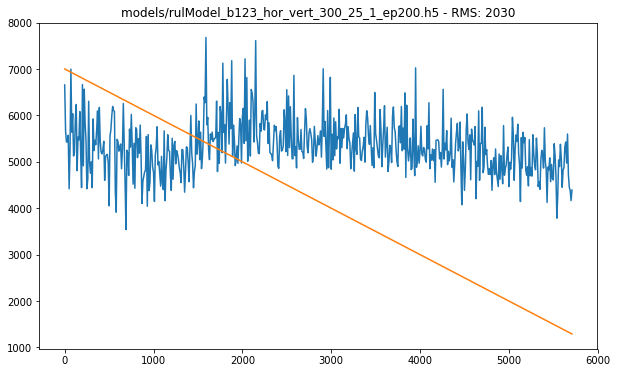

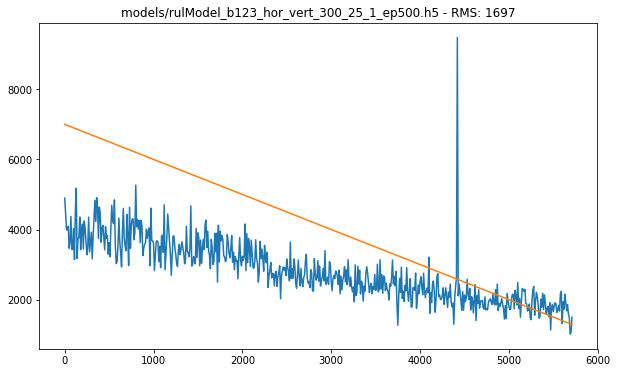

##################
# Test: 2_7
##################
172/172 [==============================] - 2s 10ms/step


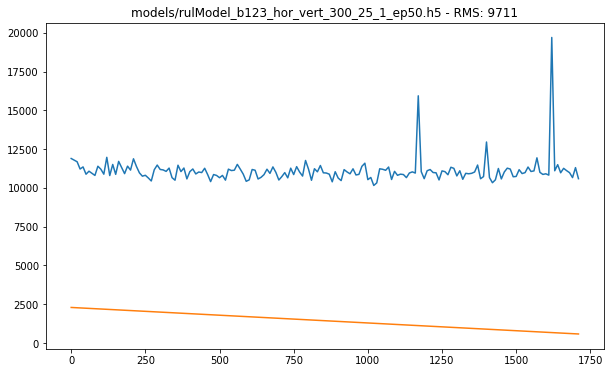

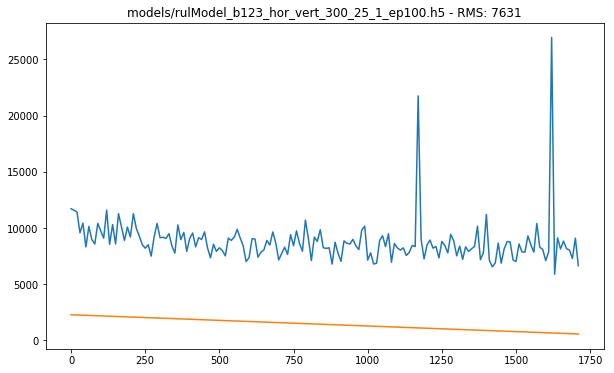

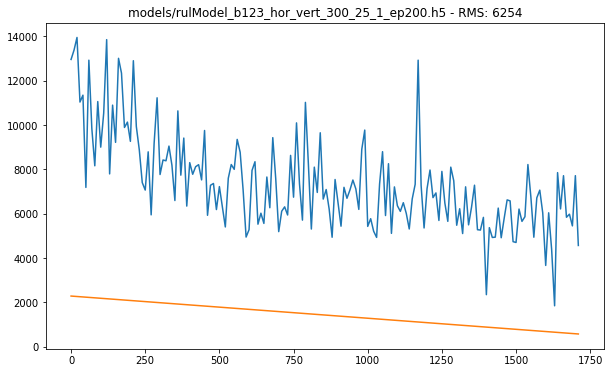

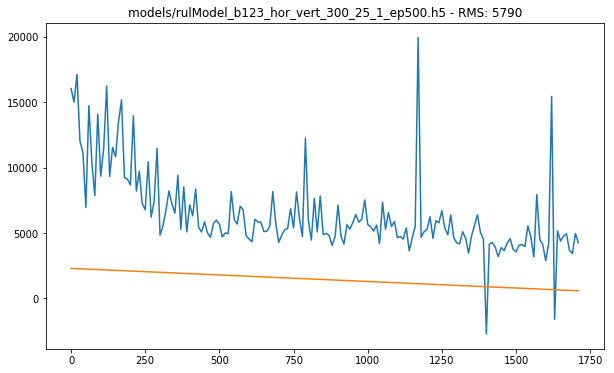

##################
# Test: 3_3
##################
352/352 [==============================] - 2s 5ms/step


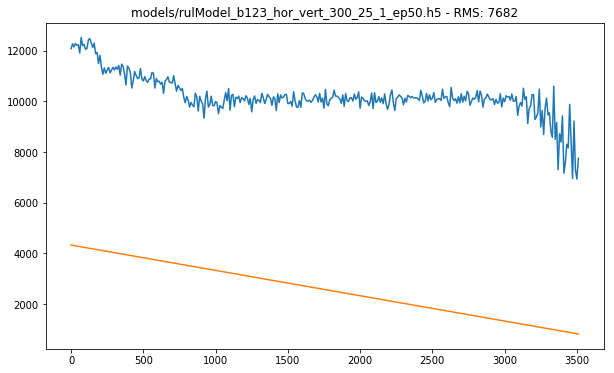

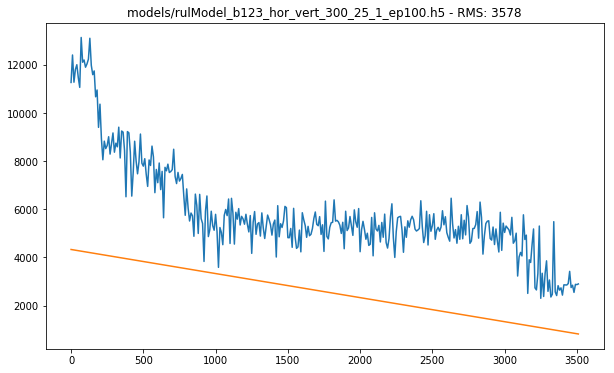

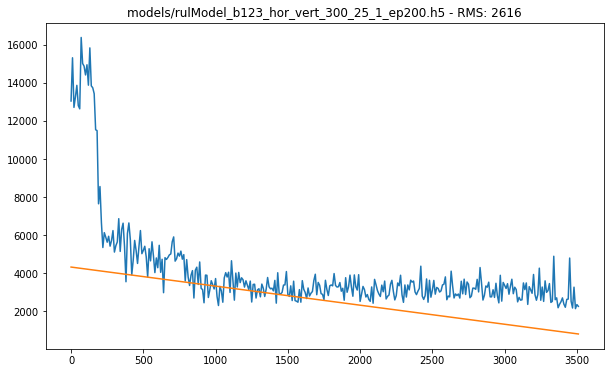

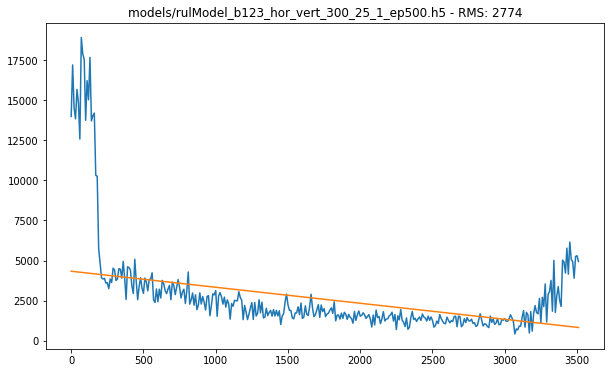

In [9]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

Epoch 1/50
7534/7534 [==============================] - 16s 2ms/step - loss: 64700442.3371
Epoch 2/50
7534/7534 [==============================] - 11s 1ms/step - loss: 41745027.2206
Epoch 3/50
7534/7534 [==============================] - 12s 2ms/step - loss: 32909147.8020
Epoch 4/50
7534/7534 [==============================] - 11s 1ms/step - loss: 11268643.2619
Epoch 5/50
7534/7534 [==============================] - 11s 1ms/step - loss: 7608147.8561
Epoch 6/50
7534/7534 [==============================] - 11s 1ms/step - loss: 6243174.4137
Epoch 7/50
7534/7534 [==============================] - 11s 1ms/step - loss: 5303039.7003
Epoch 8/50
7534/7534 [==============================] - 11s 1ms/step - loss: 4851703.4692
Epoch 9/50
7534/7534 [==============================] - 11s 1ms/step - loss: 4334955.0214
Epoch 10/50
7534/7534 [==============================] - 11s 1ms/step - loss: 3856241.8997
Epoch 11/50
7534/7534 [==============================] - 11s 1ms/step - loss: 3302159.3024
Epoc

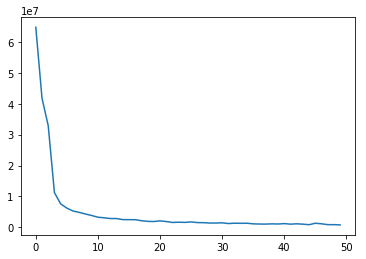

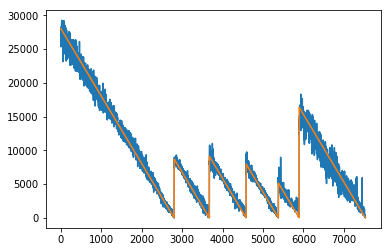

Epoch 1/100
7534/7534 [==============================] - 16s 2ms/step - loss: 65836190.3849
Epoch 2/100
7534/7534 [==============================] - 11s 1ms/step - loss: 41687094.5633
Epoch 3/100
7534/7534 [==============================] - 11s 1ms/step - loss: 32000837.0000
Epoch 4/100
7534/7534 [==============================] - 11s 1ms/step - loss: 10840077.3690
Epoch 5/100
7534/7534 [==============================] - 11s 2ms/step - loss: 6820100.5718
Epoch 6/100
7534/7534 [==============================] - 11s 2ms/step - loss: 6474924.0489
Epoch 7/100
7534/7534 [==============================] - 11s 1ms/step - loss: 5437140.2578
Epoch 8/100
7534/7534 [==============================] - 11s 1ms/step - loss: 5079894.5415
Epoch 9/100
7534/7534 [==============================] - 11s 1ms/step - loss: 4560747.7086
Epoch 10/100
7534/7534 [==============================] - 11s 1ms/step - loss: 4334317.0082
Epoch 11/100
7534/7534 [==============================] - 11s 1ms/step - loss: 357065

7534/7534 [==============================] - 11s 1ms/step - loss: 417998.0865
Epoch 91/100
7534/7534 [==============================] - 11s 1ms/step - loss: 464419.4135
Epoch 92/100
7534/7534 [==============================] - 11s 1ms/step - loss: 437453.1839
Epoch 93/100
7534/7534 [==============================] - 11s 1ms/step - loss: 412225.1341
Epoch 94/100
7534/7534 [==============================] - 11s 2ms/step - loss: 367730.2071
Epoch 95/100
7534/7534 [==============================] - 11s 1ms/step - loss: 349950.8300
Epoch 96/100
7534/7534 [==============================] - 11s 1ms/step - loss: 415637.6375
Epoch 97/100
7534/7534 [==============================] - 11s 1ms/step - loss: 352968.8421
Epoch 98/100
7534/7534 [==============================] - 11s 1ms/step - loss: 374040.4773
Epoch 99/100
7534/7534 [==============================] - 11s 1ms/step - loss: 351327.3794
Epoch 100/100
7534/7534 [==============================] - 11s 1ms/step - loss: 318284.9266


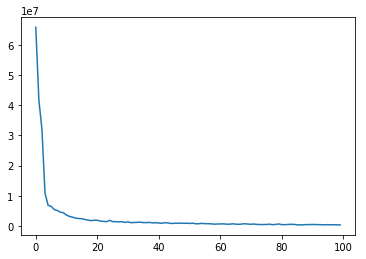

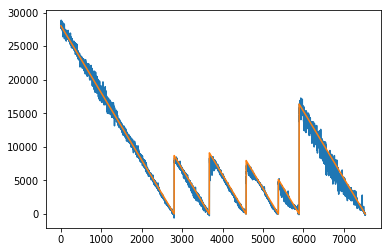

Epoch 1/200
7534/7534 [==============================] - 16s 2ms/step - loss: 63537156.3345
Epoch 2/200
7534/7534 [==============================] - 11s 2ms/step - loss: 40365686.8973
Epoch 3/200
7534/7534 [==============================] - 12s 2ms/step - loss: 23358664.9764
Epoch 4/200
7534/7534 [==============================] - 12s 2ms/step - loss: 6973034.2290
Epoch 5/200
7534/7534 [==============================] - 11s 1ms/step - loss: 5884334.4303
Epoch 6/200
7534/7534 [==============================] - 11s 1ms/step - loss: 4731772.1350
Epoch 7/200
7534/7534 [==============================] - 11s 1ms/step - loss: 4047485.2843
Epoch 8/200
7534/7534 [==============================] - 11s 2ms/step - loss: 3370991.9535
Epoch 9/200
7534/7534 [==============================] - 12s 2ms/step - loss: 2818592.4552
Epoch 10/200
7534/7534 [==============================] - 11s 1ms/step - loss: 2653959.3437
Epoch 11/200
7534/7534 [==============================] - 11s 1ms/step - loss: 2264292

7534/7534 [==============================] - 11s 2ms/step - loss: 368860.9690
Epoch 91/200
7534/7534 [==============================] - 11s 1ms/step - loss: 289565.9806
Epoch 92/200
7534/7534 [==============================] - 11s 1ms/step - loss: 287176.6918
Epoch 93/200
7534/7534 [==============================] - 11s 1ms/step - loss: 316004.7398
Epoch 94/200
7534/7534 [==============================] - 11s 1ms/step - loss: 455500.8292
Epoch 95/200
7534/7534 [==============================] - 11s 1ms/step - loss: 325860.2371
Epoch 96/200
7534/7534 [==============================] - 11s 1ms/step - loss: 271285.1072
Epoch 97/200
7534/7534 [==============================] - 11s 1ms/step - loss: 301697.2346
Epoch 98/200
7534/7534 [==============================] - 11s 1ms/step - loss: 274045.9110
Epoch 99/200
7534/7534 [==============================] - 11s 1ms/step - loss: 370371.0863
Epoch 100/200
7534/7534 [==============================] - 12s 2ms/step - loss: 418619.6974
Epoch 101/2

7534/7534 [==============================] - 11s 1ms/step - loss: 157987.7468
Epoch 180/200
7534/7534 [==============================] - 11s 1ms/step - loss: 171575.7153
Epoch 181/200
7534/7534 [==============================] - 11s 1ms/step - loss: 182038.2827
Epoch 182/200
7534/7534 [==============================] - 11s 1ms/step - loss: 161071.2827
Epoch 183/200
7534/7534 [==============================] - 11s 1ms/step - loss: 118841.1673
Epoch 184/200
7534/7534 [==============================] - 11s 1ms/step - loss: 174190.9868
Epoch 185/200
7534/7534 [==============================] - 11s 1ms/step - loss: 114784.0991
Epoch 186/200
7534/7534 [==============================] - 12s 2ms/step - loss: 124704.8374
Epoch 187/200
7534/7534 [==============================] - 11s 1ms/step - loss: 129699.0298
Epoch 188/200
7534/7534 [==============================] - 11s 1ms/step - loss: 157165.2354
Epoch 189/200
7534/7534 [==============================] - 11s 1ms/step - loss: 188938.6352
Ep

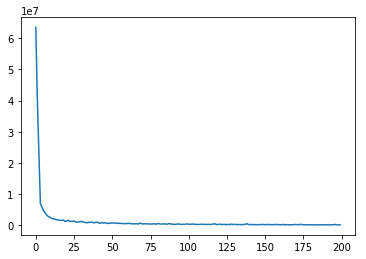

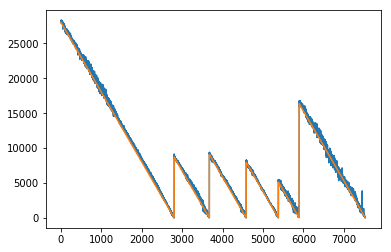

Epoch 1/500
7534/7534 [==============================] - 16s 2ms/step - loss: 65948861.8784
Epoch 2/500
7534/7534 [==============================] - 18s 2ms/step - loss: 41078334.1996
Epoch 3/500
7534/7534 [==============================] - 18s 2ms/step - loss: 31532550.4874
Epoch 4/500
7534/7534 [==============================] - 19s 3ms/step - loss: 9556470.3637
Epoch 5/500
7534/7534 [==============================] - 18s 2ms/step - loss: 6636735.7613
Epoch 6/500
7534/7534 [==============================] - 18s 2ms/step - loss: 5804582.9052
Epoch 7/500
7534/7534 [==============================] - 18s 2ms/step - loss: 5688743.3597
Epoch 8/500
7534/7534 [==============================] - 17s 2ms/step - loss: 4764308.6629
Epoch 9/500
7534/7534 [==============================] - 20s 3ms/step - loss: 4189908.0463
Epoch 10/500
7534/7534 [==============================] - 16s 2ms/step - loss: 3693137.3663
Epoch 11/500
7534/7534 [==============================] - 16s 2ms/step - loss: 3154726

7534/7534 [==============================] - 11s 1ms/step - loss: 497774.0772
Epoch 91/500
7534/7534 [==============================] - 11s 1ms/step - loss: 467765.2152
Epoch 92/500
7534/7534 [==============================] - 11s 1ms/step - loss: 436967.3921
Epoch 93/500
7534/7534 [==============================] - 11s 1ms/step - loss: 418756.6335
Epoch 94/500
7534/7534 [==============================] - 12s 2ms/step - loss: 532227.2016
Epoch 95/500
7534/7534 [==============================] - 11s 1ms/step - loss: 440430.5456
Epoch 96/500
7534/7534 [==============================] - 11s 1ms/step - loss: 452658.3414
Epoch 97/500
7534/7534 [==============================] - 12s 2ms/step - loss: 342376.2290
Epoch 98/500
7534/7534 [==============================] - 11s 1ms/step - loss: 378285.3133
Epoch 99/500
7534/7534 [==============================] - 11s 1ms/step - loss: 479747.5792
Epoch 100/500
7534/7534 [==============================] - 11s 1ms/step - loss: 379853.2231
Epoch 101/5

7534/7534 [==============================] - 11s 1ms/step - loss: 176029.5860
Epoch 180/500
7534/7534 [==============================] - 11s 1ms/step - loss: 200437.4432
Epoch 181/500
7534/7534 [==============================] - 11s 1ms/step - loss: 249779.8937
Epoch 182/500
7534/7534 [==============================] - 11s 1ms/step - loss: 172066.2410
Epoch 183/500
7534/7534 [==============================] - 11s 1ms/step - loss: 214185.0323
Epoch 184/500
7534/7534 [==============================] - 11s 1ms/step - loss: 192159.0500
Epoch 185/500
7534/7534 [==============================] - 11s 1ms/step - loss: 182377.4146
Epoch 186/500
7534/7534 [==============================] - 11s 1ms/step - loss: 238273.2384
Epoch 187/500
7534/7534 [==============================] - 11s 1ms/step - loss: 210162.5493
Epoch 188/500
7534/7534 [==============================] - 11s 1ms/step - loss: 142709.1573
Epoch 189/500
7534/7534 [==============================] - 11s 1ms/step - loss: 189504.8918
Ep

7534/7534 [==============================] - 11s 1ms/step - loss: 119038.7316
Epoch 269/500
7534/7534 [==============================] - 11s 1ms/step - loss: 78978.9196
Epoch 270/500
7534/7534 [==============================] - 11s 1ms/step - loss: 130443.0415
Epoch 271/500
7534/7534 [==============================] - 11s 2ms/step - loss: 94470.6647
Epoch 272/500
7534/7534 [==============================] - 11s 1ms/step - loss: 168757.7592
Epoch 273/500
7534/7534 [==============================] - 11s 1ms/step - loss: 123449.0698
Epoch 274/500
7534/7534 [==============================] - 11s 1ms/step - loss: 124228.8927
Epoch 275/500
7534/7534 [==============================] - 11s 1ms/step - loss: 134092.3809
Epoch 276/500
7534/7534 [==============================] - 11s 1ms/step - loss: 79902.4317
Epoch 277/500
7534/7534 [==============================] - 11s 1ms/step - loss: 117208.6073
Epoch 278/500
7534/7534 [==============================] - 11s 1ms/step - loss: 82771.6445
Epoch 

7534/7534 [==============================] - 12s 2ms/step - loss: 86025.5159
Epoch 358/500
7534/7534 [==============================] - 11s 1ms/step - loss: 91196.7102
Epoch 359/500
7534/7534 [==============================] - 11s 1ms/step - loss: 70151.7824
Epoch 360/500
7534/7534 [==============================] - 11s 1ms/step - loss: 83237.0768
Epoch 361/500
7534/7534 [==============================] - 11s 1ms/step - loss: 48113.3748
Epoch 362/500
7534/7534 [==============================] - 11s 1ms/step - loss: 60564.5065
Epoch 363/500
7534/7534 [==============================] - 11s 1ms/step - loss: 92966.7372
Epoch 364/500
7534/7534 [==============================] - 11s 1ms/step - loss: 110847.0399
Epoch 365/500
7534/7534 [==============================] - 11s 1ms/step - loss: 66561.2149
Epoch 366/500
7534/7534 [==============================] - 11s 1ms/step - loss: 53354.2417
Epoch 367/500
7534/7534 [==============================] - 11s 1ms/step - loss: 75980.8369
Epoch 368/50

7534/7534 [==============================] - 11s 1ms/step - loss: 61531.1310
Epoch 448/500
7534/7534 [==============================] - 11s 1ms/step - loss: 40595.4909
Epoch 449/500
7534/7534 [==============================] - 11s 1ms/step - loss: 49112.3284
Epoch 450/500
7534/7534 [==============================] - 11s 1ms/step - loss: 46039.9954
Epoch 451/500
7534/7534 [==============================] - 11s 1ms/step - loss: 52273.1207
Epoch 452/500
7534/7534 [==============================] - 11s 1ms/step - loss: 39473.7361
Epoch 453/500
7534/7534 [==============================] - 11s 1ms/step - loss: 341401.0847
Epoch 454/500
7534/7534 [==============================] - 11s 1ms/step - loss: 69272.2913
Epoch 455/500
7534/7534 [==============================] - 12s 2ms/step - loss: 32010.0066
Epoch 456/500
7534/7534 [==============================] - 11s 1ms/step - loss: 29184.0806
Epoch 457/500
7534/7534 [==============================] - 11s 1ms/step - loss: 30080.7298
Epoch 458/50

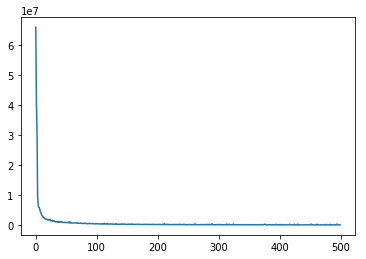

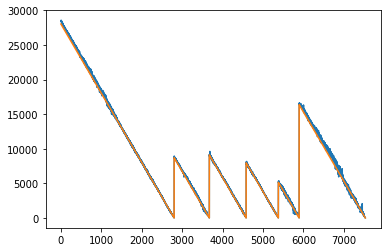

In [10]:
layersizes = [1000, 900,600,300,150,25]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 3s 1ms/step


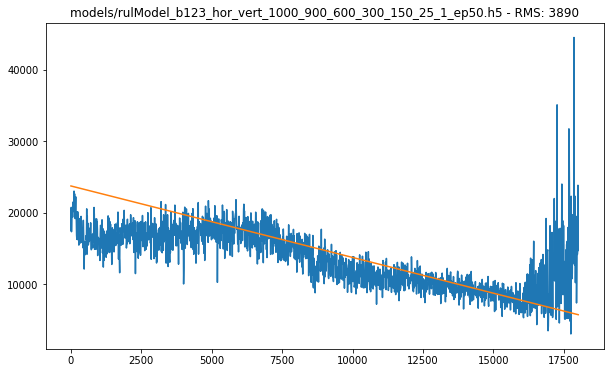

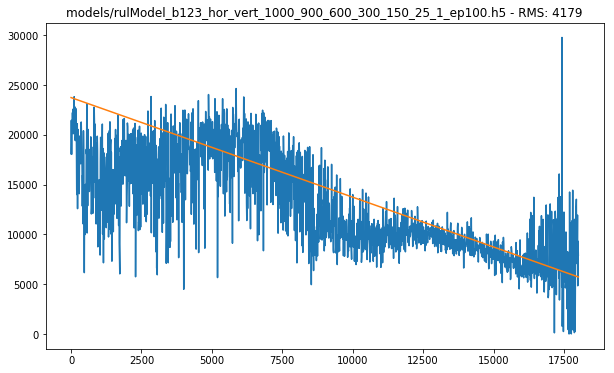

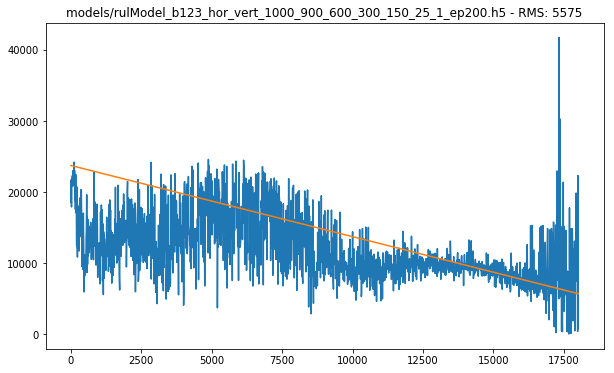

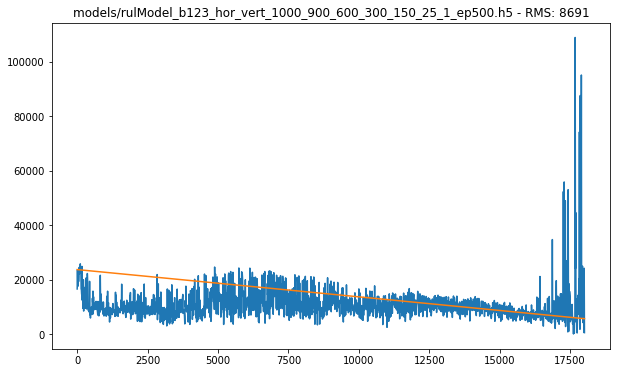

##################
# Test: 1_4
##################
1139/1139 [==============================] - 3s 2ms/step


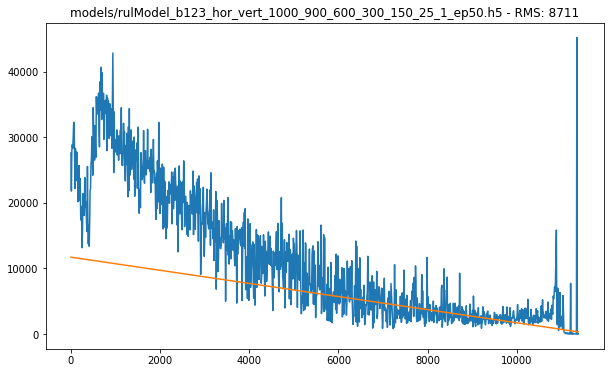

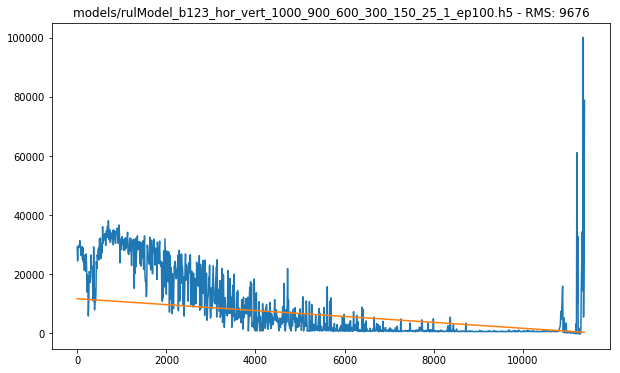

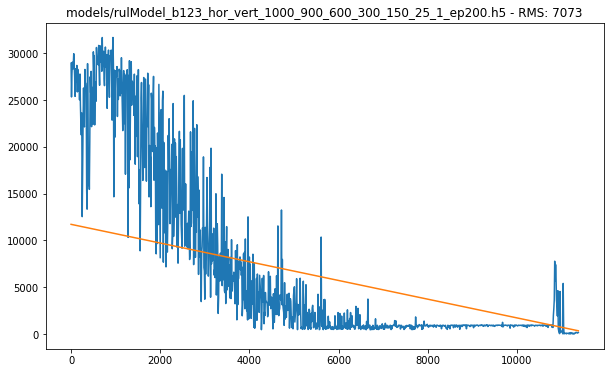

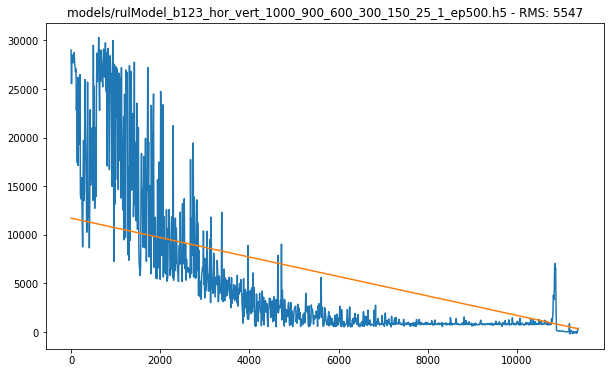

##################
# Test: 1_5
##################
2302/2302 [==============================] - 3s 1ms/step


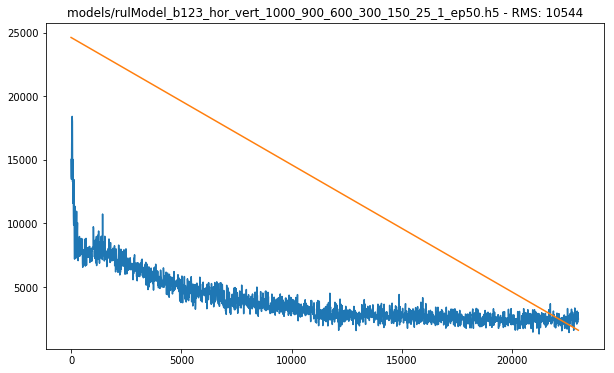

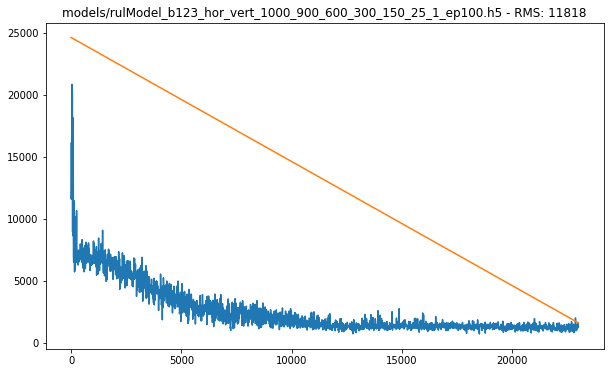

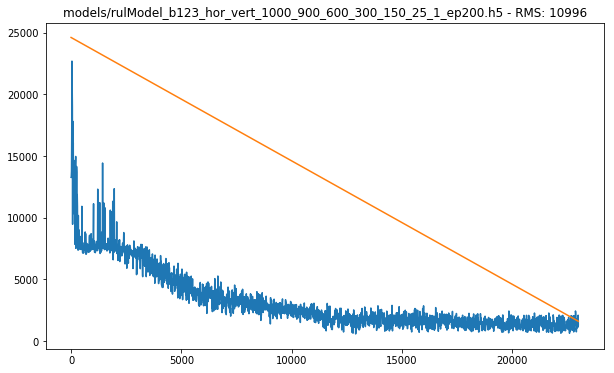

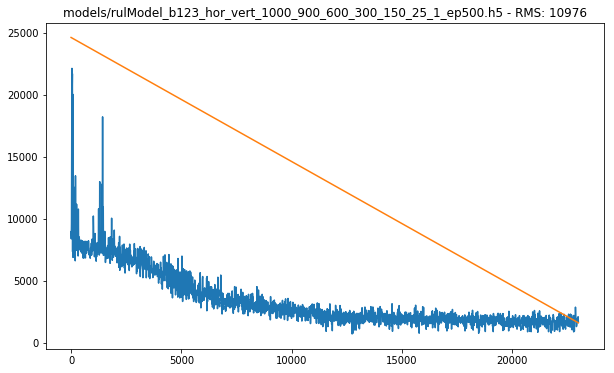

##################
# Test: 1_6
##################
2302/2302 [==============================] - 3s 1ms/step


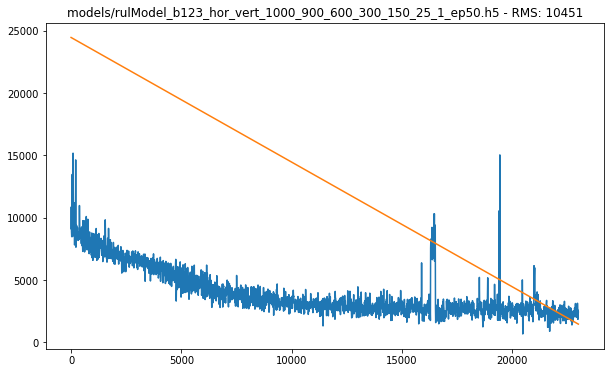

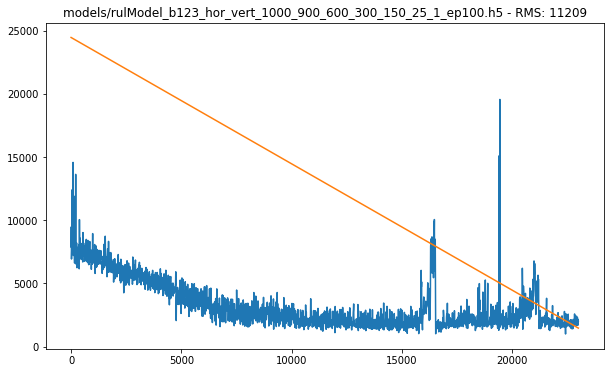

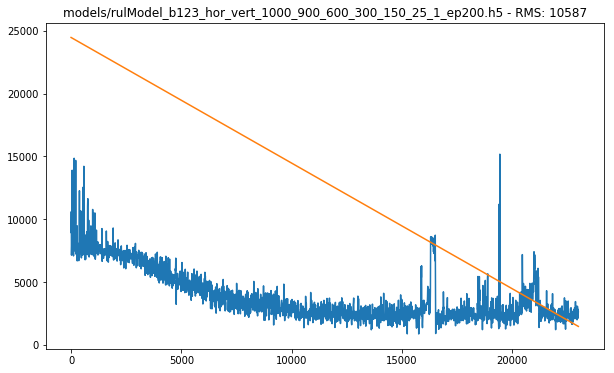

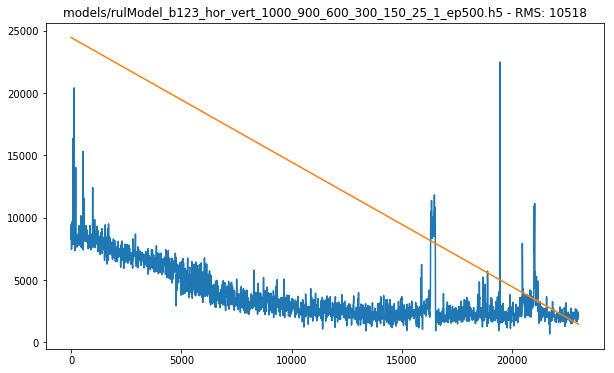

##################
# Test: 1_7
##################
1502/1502 [==============================] - 3s 2ms/step


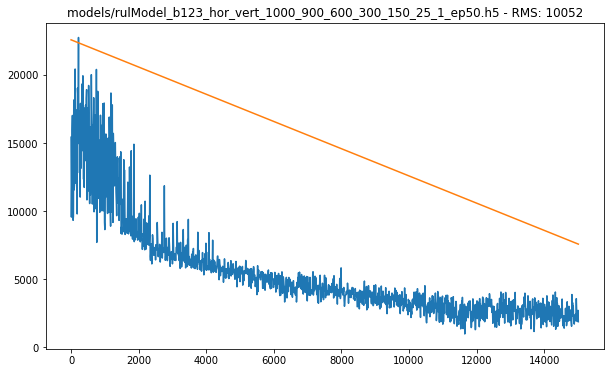

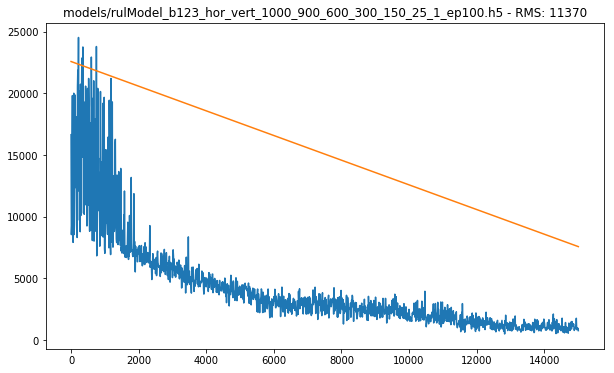

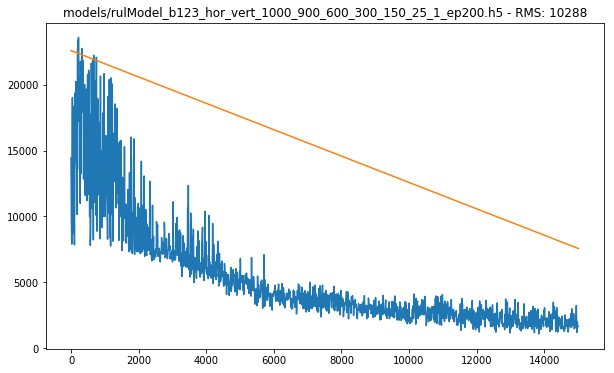

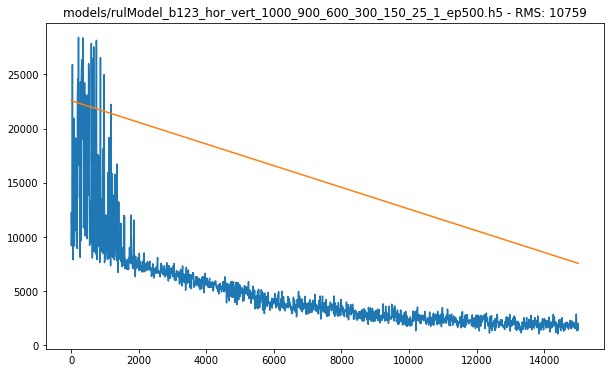

##################
# Test: 2_3
##################
1202/1202 [==============================] - 3s 3ms/step


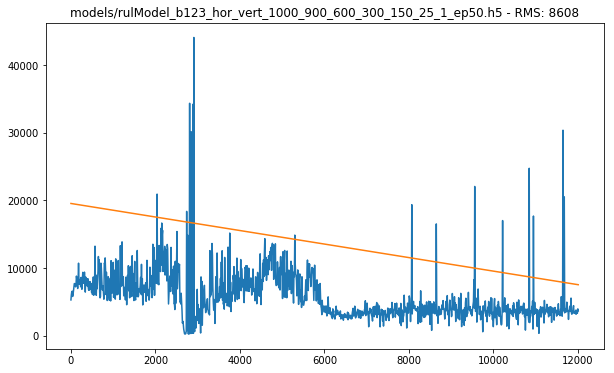

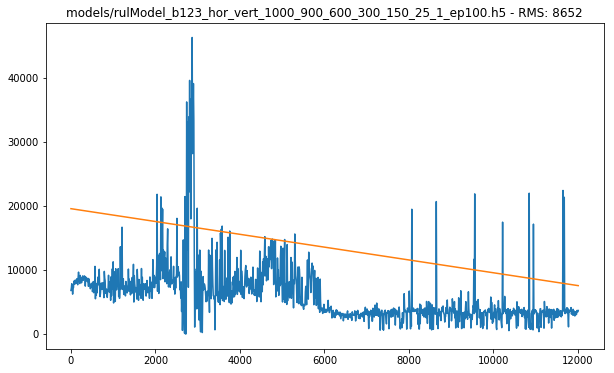

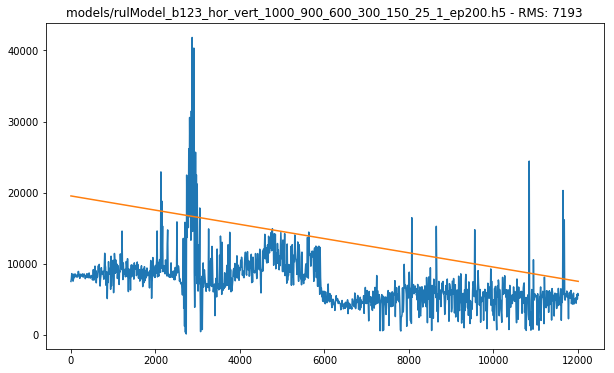

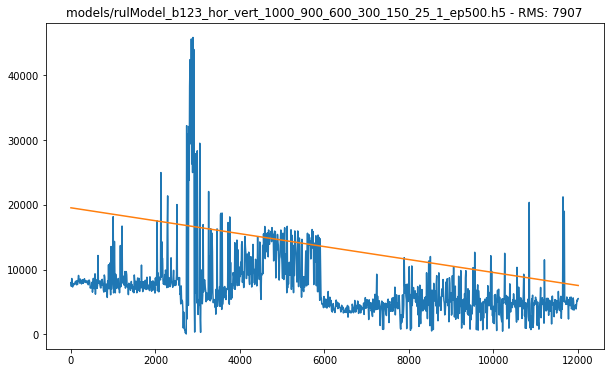

##################
# Test: 2_4
##################
612/612 [==============================] - 3s 6ms/step


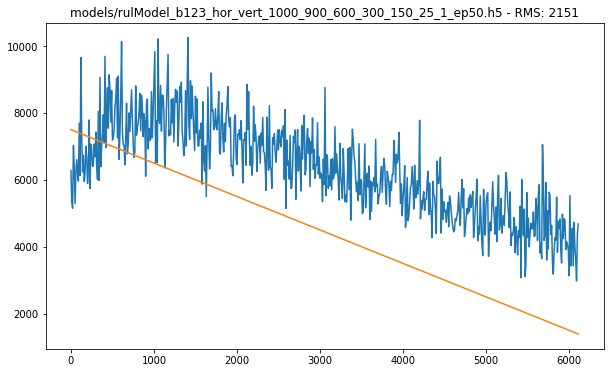

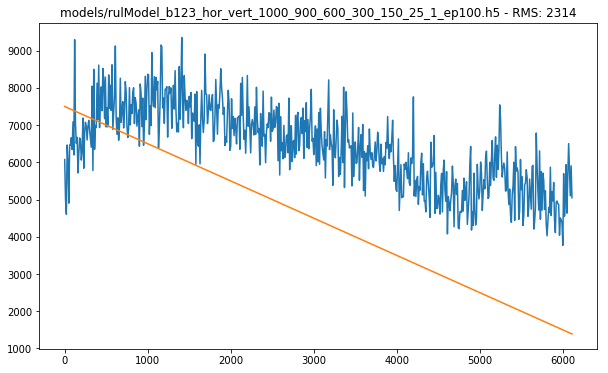

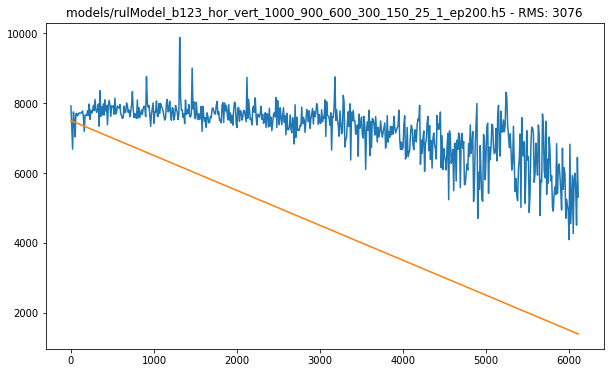

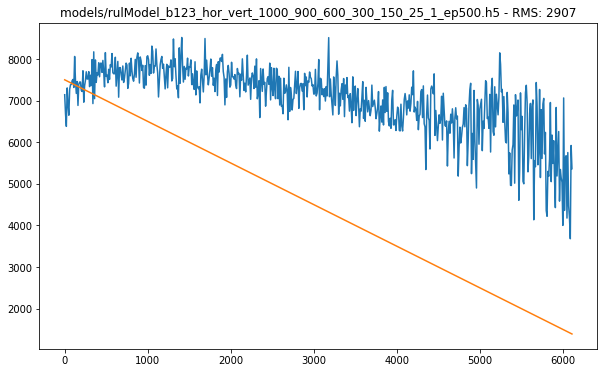

##################
# Test: 2_5
##################
2002/2002 [==============================] - 4s 2ms/step


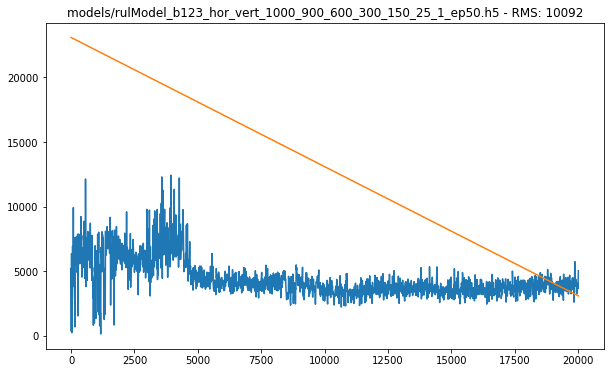

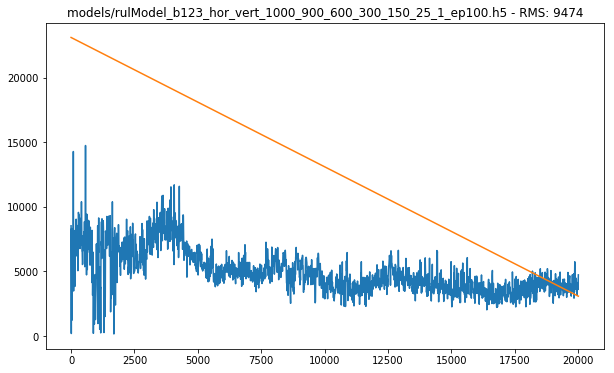

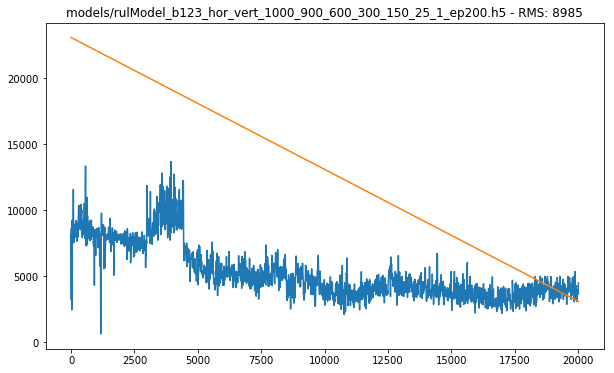

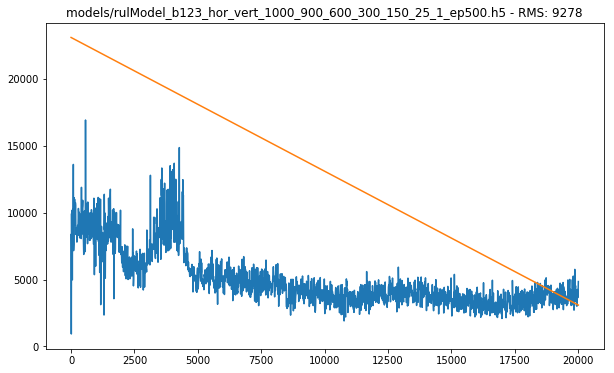

##################
# Test: 2_6
##################
572/572 [==============================] - 4s 7ms/step


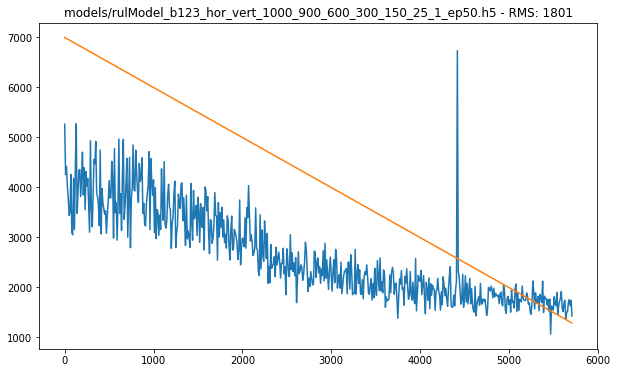

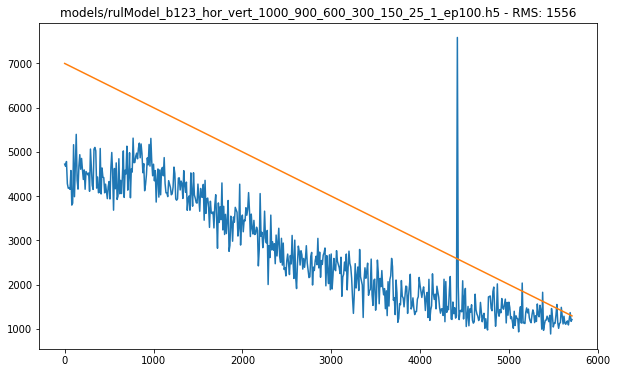

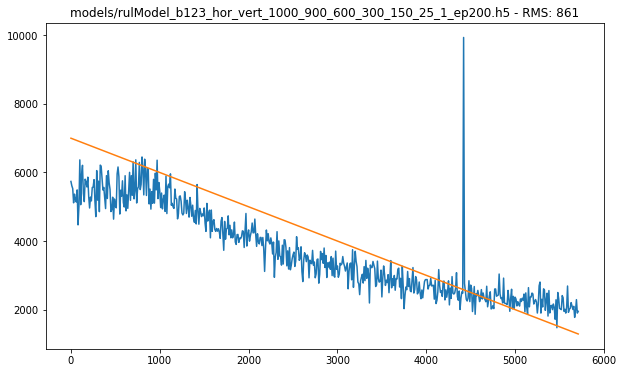

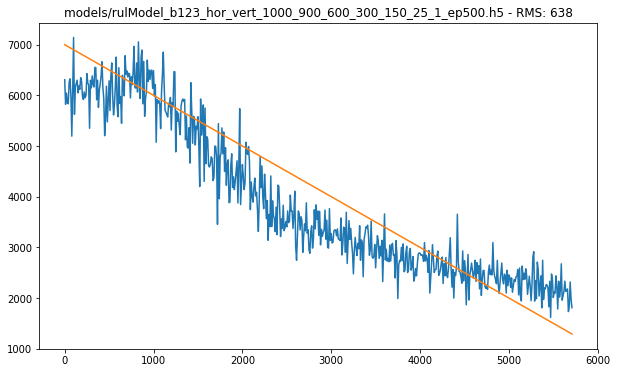

##################
# Test: 2_7
##################
172/172 [==============================] - 4s 23ms/step


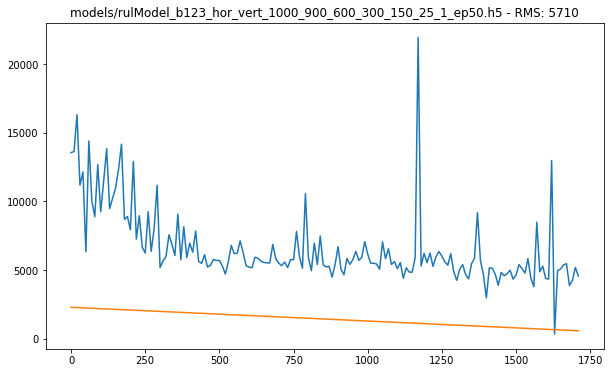

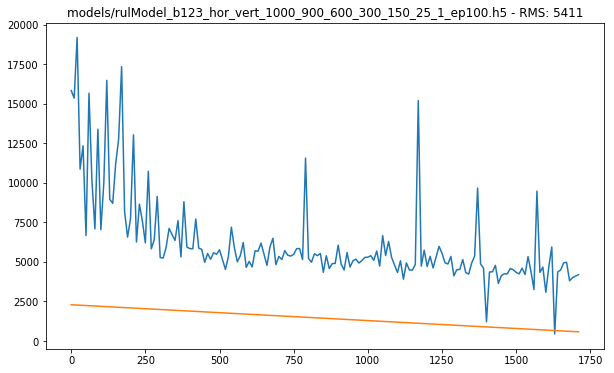

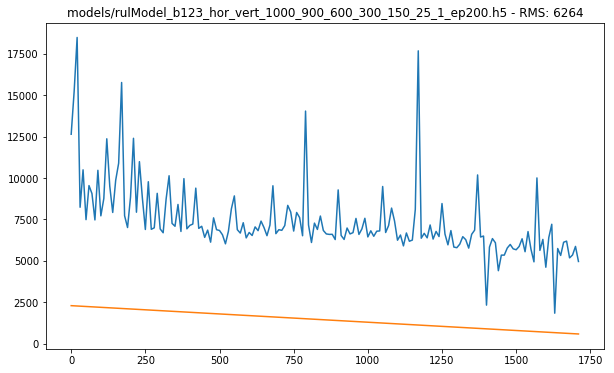

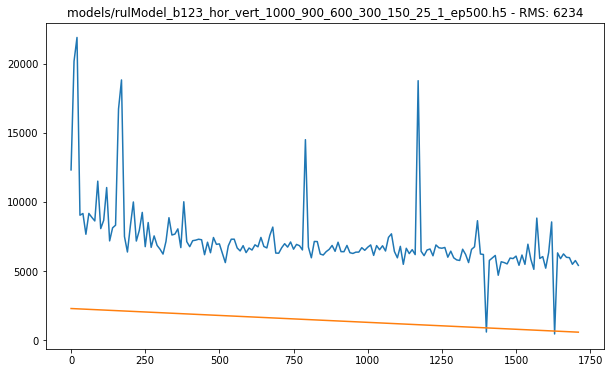

##################
# Test: 3_3
##################
352/352 [==============================] - 5s 13ms/step


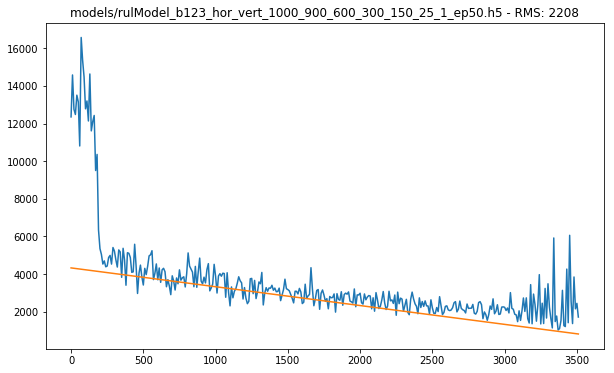

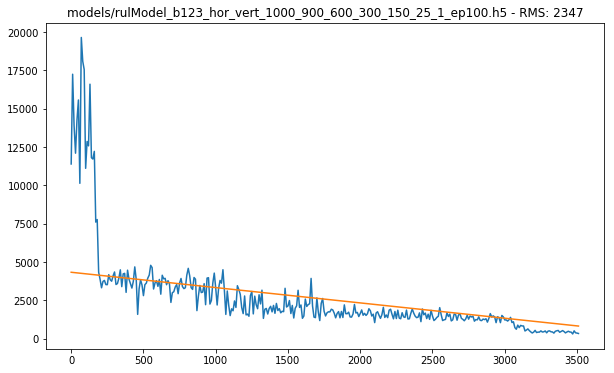

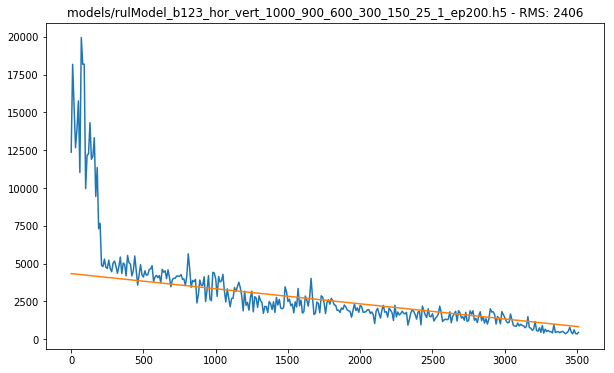

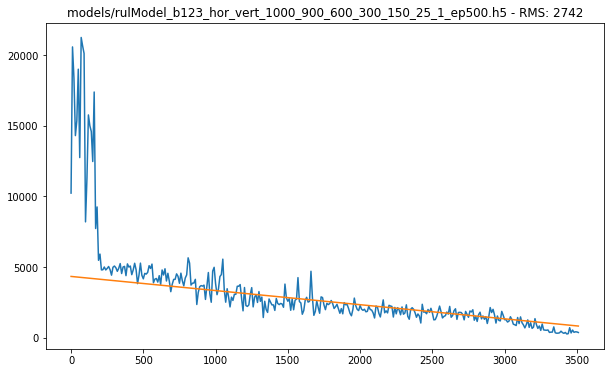

In [11]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

Epoch 1/50
7534/7534 [==============================] - 12s 2ms/step - loss: 125849939.8811
Epoch 2/50
7534/7534 [==============================] - 2s 227us/step - loss: 125733292.7826
Epoch 3/50
7534/7534 [==============================] - 2s 286us/step - loss: 125506357.7744
Epoch 4/50
7534/7534 [==============================] - 2s 249us/step - loss: 125178368.3971
Epoch 5/50
7534/7534 [==============================] - 2s 225us/step - loss: 124757970.5527
Epoch 6/50
7534/7534 [==============================] - 2s 242us/step - loss: 124253257.2806
Epoch 7/50
7534/7534 [==============================] - 2s 228us/step - loss: 123672303.2482
Epoch 8/50
7534/7534 [==============================] - 2s 222us/step - loss: 123022448.6095
Epoch 9/50
7534/7534 [==============================] - 2s 221us/step - loss: 122308379.2047
Epoch 10/50
7534/7534 [==============================] - 2s 225us/step - loss: 121535273.3698
Epoch 11/50
7534/7534 [==============================] - 2s 220us/step

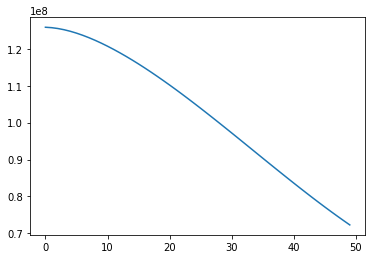

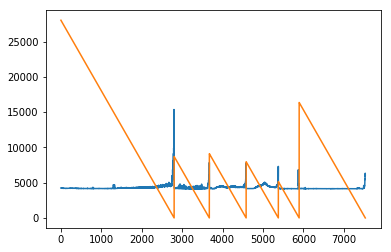

Epoch 1/100
7534/7534 [==============================] - 11s 2ms/step - loss: 125846142.5559
Epoch 2/100
7534/7534 [==============================] - 2s 216us/step - loss: 125717297.6289
Epoch 3/100
7534/7534 [==============================] - 2s 215us/step - loss: 125470113.0321
Epoch 4/100
7534/7534 [==============================] - 2s 215us/step - loss: 125111453.1627
Epoch 5/100
7534/7534 [==============================] - 2s 212us/step - loss: 124651502.1757
Epoch 6/100
7534/7534 [==============================] - 2s 214us/step - loss: 124102524.8187
Epoch 7/100
7534/7534 [==============================] - 2s 217us/step - loss: 123470017.9326
Epoch 8/100
7534/7534 [==============================] - 2s 218us/step - loss: 122762831.2864
Epoch 9/100
7534/7534 [==============================] - 2s 212us/step - loss: 121986786.0706
Epoch 10/100
7534/7534 [==============================] - 2s 214us/step - loss: 121146987.6740
Epoch 11/100
7534/7534 [==============================] - 2s

Epoch 88/100
7534/7534 [==============================] - 2s 218us/step - loss: 51945792.3663
Epoch 89/100
7534/7534 [==============================] - 2s 212us/step - loss: 51895347.5381
Epoch 90/100
7534/7534 [==============================] - 2s 213us/step - loss: 51846888.9589
Epoch 91/100
7534/7534 [==============================] - 2s 216us/step - loss: 51799622.4104
Epoch 92/100
7534/7534 [==============================] - 2s 214us/step - loss: 51752853.3411
Epoch 93/100
7534/7534 [==============================] - 2s 216us/step - loss: 51707146.2978
Epoch 94/100
7534/7534 [==============================] - 2s 211us/step - loss: 51662597.6979
Epoch 95/100
7534/7534 [==============================] - 2s 216us/step - loss: 51617234.7109
Epoch 96/100
7534/7534 [==============================] - 2s 213us/step - loss: 51574350.0016
Epoch 97/100
7534/7534 [==============================] - 2s 212us/step - loss: 51529708.3132
Epoch 98/100
7534/7534 [==============================] - 2s

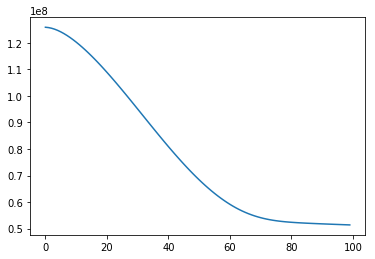

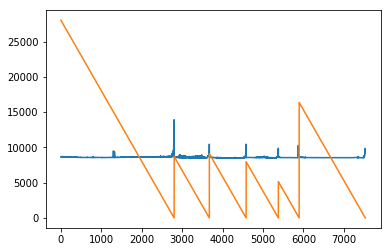

Epoch 1/200
7534/7534 [==============================] - 11s 1ms/step - loss: 125847456.9366
Epoch 2/200
7534/7534 [==============================] - 2s 214us/step - loss: 125718600.4502
Epoch 3/200
7534/7534 [==============================] - 2s 216us/step - loss: 125471918.3902
Epoch 4/200
7534/7534 [==============================] - 2s 219us/step - loss: 125115664.5649
Epoch 5/200
7534/7534 [==============================] - 2s 220us/step - loss: 124658705.3422
Epoch 6/200
7534/7534 [==============================] - 2s 217us/step - loss: 124109502.6153
Epoch 7/200
7534/7534 [==============================] - 2s 218us/step - loss: 123478812.3621
Epoch 8/200
7534/7534 [==============================] - 2s 218us/step - loss: 122773625.5885
Epoch 9/200
7534/7534 [==============================] - 2s 214us/step - loss: 121998646.5792
Epoch 10/200
7534/7534 [==============================] - 2s 216us/step - loss: 121158886.7661
Epoch 11/200
7534/7534 [==============================] - 2s

Epoch 88/200
7534/7534 [==============================] - 2s 221us/step - loss: 51950434.4651
Epoch 89/200
7534/7534 [==============================] - 2s 235us/step - loss: 51901025.1649
Epoch 90/200
7534/7534 [==============================] - 2s 228us/step - loss: 51852788.4938
Epoch 91/200
7534/7534 [==============================] - 2s 218us/step - loss: 51805671.4351
Epoch 92/200
7534/7534 [==============================] - 2s 224us/step - loss: 51759392.8410
Epoch 93/200
7534/7534 [==============================] - 2s 235us/step - loss: 51714390.1524
Epoch 94/200
7534/7534 [==============================] - 2s 284us/step - loss: 51669396.5915
Epoch 95/200
7534/7534 [==============================] - 2s 249us/step - loss: 51625106.3679
Epoch 96/200
7534/7534 [==============================] - 2s 219us/step - loss: 51581569.2774
Epoch 97/200
7534/7534 [==============================] - 2s 216us/step - loss: 51537535.2079
Epoch 98/200
7534/7534 [==============================] - 2s

7534/7534 [==============================] - 2s 215us/step - loss: 48505500.2198
Epoch 175/200
7534/7534 [==============================] - 2s 224us/step - loss: 48468992.2506
Epoch 176/200
7534/7534 [==============================] - 2s 215us/step - loss: 48433467.1516
Epoch 177/200
7534/7534 [==============================] - 2s 214us/step - loss: 48397107.5020
Epoch 178/200
7534/7534 [==============================] - 2s 217us/step - loss: 48361471.9660
Epoch 179/200
7534/7534 [==============================] - 2s 220us/step - loss: 48325790.7746
Epoch 180/200
7534/7534 [==============================] - 2s 214us/step - loss: 48291048.3600
Epoch 181/200
7534/7534 [==============================] - 2s 215us/step - loss: 48253736.4906
Epoch 182/200
7534/7534 [==============================] - 2s 218us/step - loss: 48218053.4717
Epoch 183/200
7534/7534 [==============================] - 2s 217us/step - loss: 48182501.6480
Epoch 184/200
7534/7534 [==============================] - 2s 21

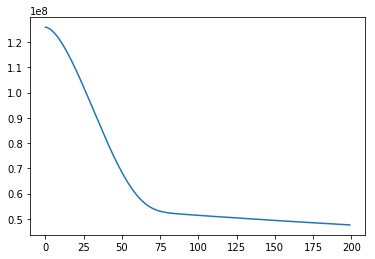

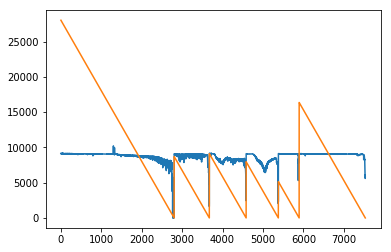

Epoch 1/500
7534/7534 [==============================] - 11s 1ms/step - loss: 125848645.9145
Epoch 2/500
7534/7534 [==============================] - 2s 220us/step - loss: 125726276.8484
Epoch 3/500
7534/7534 [==============================] - 2s 216us/step - loss: 125489473.6353
Epoch 4/500
7534/7534 [==============================] - 2s 213us/step - loss: 125146032.7242
Epoch 5/500
7534/7534 [==============================] - 2s 218us/step - loss: 124707077.1054
Epoch 6/500
7534/7534 [==============================] - 2s 216us/step - loss: 124180986.5315
Epoch 7/500
7534/7534 [==============================] - 2s 226us/step - loss: 123575660.8442
Epoch 8/500
7534/7534 [==============================] - 2s 229us/step - loss: 122897534.8978
Epoch 9/500
7534/7534 [==============================] - 2s 224us/step - loss: 122152466.0812
Epoch 10/500
7534/7534 [==============================] - 2s 217us/step - loss: 121346525.4983
Epoch 11/500
7534/7534 [==============================] - 2s

Epoch 88/500
7534/7534 [==============================] - 2s 221us/step - loss: 52062441.0703
Epoch 89/500
7534/7534 [==============================] - 2s 217us/step - loss: 52008200.0287
Epoch 90/500
7534/7534 [==============================] - 2s 217us/step - loss: 51957431.2546
Epoch 91/500
7534/7534 [==============================] - 2s 222us/step - loss: 51909178.4444
Epoch 92/500
7534/7534 [==============================] - 2s 215us/step - loss: 51861423.3523
Epoch 93/500
7534/7534 [==============================] - 2s 216us/step - loss: 51815507.2089
Epoch 94/500
7534/7534 [==============================] - 2s 236us/step - loss: 51769491.6039
Epoch 95/500
7534/7534 [==============================] - 2s 237us/step - loss: 51724858.7587
Epoch 96/500
7534/7534 [==============================] - 2s 222us/step - loss: 51680939.8094
Epoch 97/500
7534/7534 [==============================] - 2s 220us/step - loss: 51637707.2068
Epoch 98/500
7534/7534 [==============================] - 2s

7534/7534 [==============================] - 2s 219us/step - loss: 48650396.6053
Epoch 175/500
7534/7534 [==============================] - 2s 219us/step - loss: 48614868.8208
Epoch 176/500
7534/7534 [==============================] - 2s 215us/step - loss: 48578979.4085
Epoch 177/500
7534/7534 [==============================] - 2s 218us/step - loss: 48543848.3058
Epoch 178/500
7534/7534 [==============================] - 2s 219us/step - loss: 48508363.2206
Epoch 179/500
7534/7534 [==============================] - 2s 217us/step - loss: 48473313.3942
Epoch 180/500
7534/7534 [==============================] - 2s 215us/step - loss: 48437899.9947
Epoch 181/500
7534/7534 [==============================] - 2s 218us/step - loss: 48403127.6496
Epoch 182/500
7534/7534 [==============================] - 2s 219us/step - loss: 48367586.3881
Epoch 183/500
7534/7534 [==============================] - 2s 216us/step - loss: 48332651.8099
Epoch 184/500
7534/7534 [==============================] - 2s 21

7534/7534 [==============================] - 2s 214us/step - loss: 45685504.1795
Epoch 261/500
7534/7534 [==============================] - 2s 214us/step - loss: 45651598.9259
Epoch 262/500
7534/7534 [==============================] - 2s 222us/step - loss: 45617471.1431
Epoch 263/500
7534/7534 [==============================] - 2s 217us/step - loss: 45584053.7213
Epoch 264/500
7534/7534 [==============================] - 2s 215us/step - loss: 45550347.2089
Epoch 265/500
7534/7534 [==============================] - 2s 219us/step - loss: 45517168.8123
Epoch 266/500
7534/7534 [==============================] - 2s 218us/step - loss: 45483011.5338
Epoch 267/500
7534/7534 [==============================] - 2s 214us/step - loss: 45449496.3377
Epoch 268/500
7534/7534 [==============================] - 2s 214us/step - loss: 45416257.3167
Epoch 269/500
7534/7534 [==============================] - 2s 220us/step - loss: 45382635.7696
Epoch 270/500
7534/7534 [==============================] - 2s 21

7534/7534 [==============================] - 2s 215us/step - loss: 42895980.2888
Epoch 347/500
7534/7534 [==============================] - 2s 261us/step - loss: 42865110.1609
Epoch 348/500
7534/7534 [==============================] - 2s 252us/step - loss: 42835084.7996
Epoch 349/500
7534/7534 [==============================] - 2s 248us/step - loss: 42804740.9780
Epoch 350/500
7534/7534 [==============================] - 2s 238us/step - loss: 42774641.2477
Epoch 351/500
7534/7534 [==============================] - 2s 222us/step - loss: 42744163.6135
Epoch 352/500
7534/7534 [==============================] - 2s 215us/step - loss: 42714401.3077
Epoch 353/500
7534/7534 [==============================] - 2s 221us/step - loss: 42684320.9950
Epoch 354/500
7534/7534 [==============================] - 2s 217us/step - loss: 42654338.9456
Epoch 355/500
7534/7534 [==============================] - 2s 217us/step - loss: 42625309.0438
Epoch 356/500
7534/7534 [==============================] - 2s 21

7534/7534 [==============================] - 2s 219us/step - loss: 40603530.6047
Epoch 433/500
7534/7534 [==============================] - 2s 241us/step - loss: 40580355.3071
Epoch 434/500
7534/7534 [==============================] - 2s 264us/step - loss: 40557424.9185
Epoch 435/500
7534/7534 [==============================] - 2s 222us/step - loss: 40534661.5928
Epoch 436/500
7534/7534 [==============================] - 2s 219us/step - loss: 40511222.0727
Epoch 437/500
7534/7534 [==============================] - 2s 218us/step - loss: 40488571.6050
Epoch 438/500
7534/7534 [==============================] - 2s 215us/step - loss: 40466382.7475
Epoch 439/500
7534/7534 [==============================] - 2s 216us/step - loss: 40443854.5511
Epoch 440/500
7534/7534 [==============================] - 2s 218us/step - loss: 40421029.9007
Epoch 441/500
7534/7534 [==============================] - 2s 214us/step - loss: 40398854.2171
Epoch 442/500
7534/7534 [==============================] - 2s 21

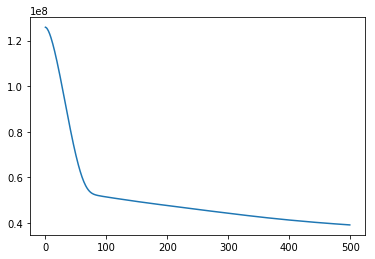

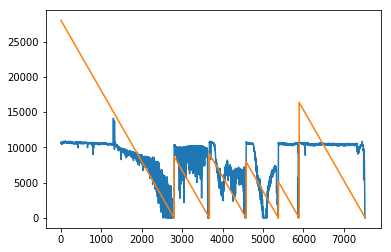

In [12]:
layersizes = [50]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 5s 3ms/step


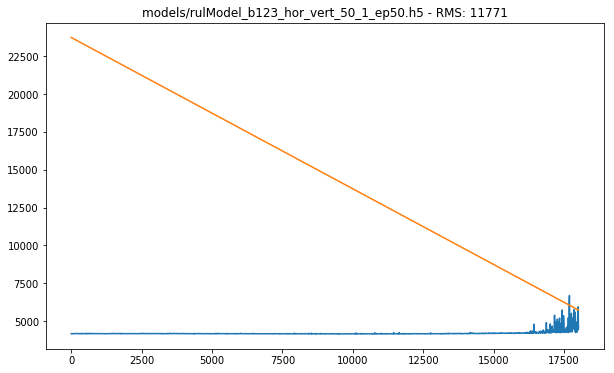

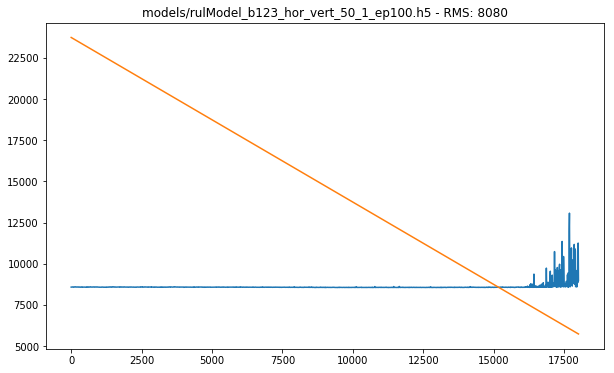

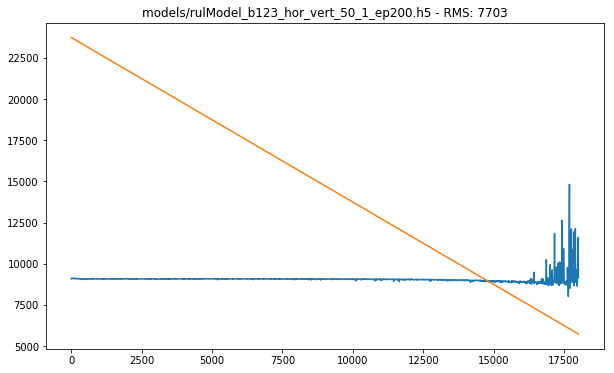

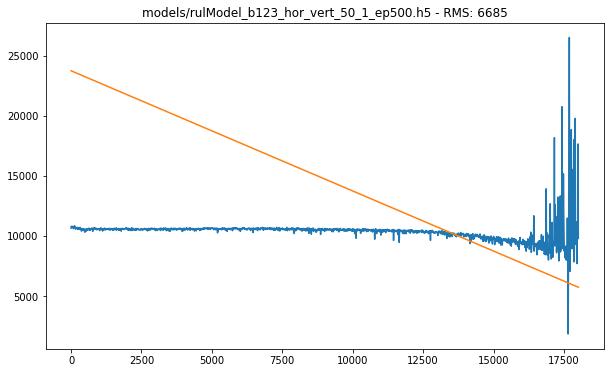

##################
# Test: 1_4
##################
1139/1139 [==============================] - 5s 4ms/step


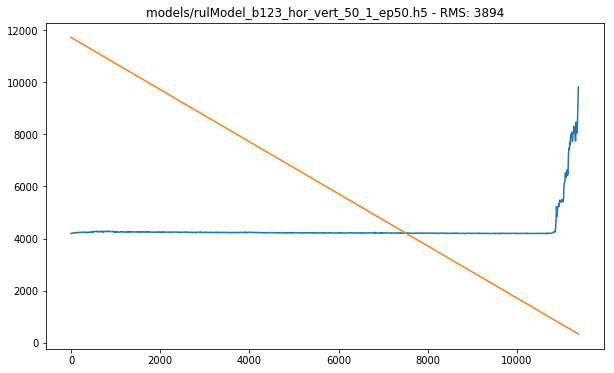

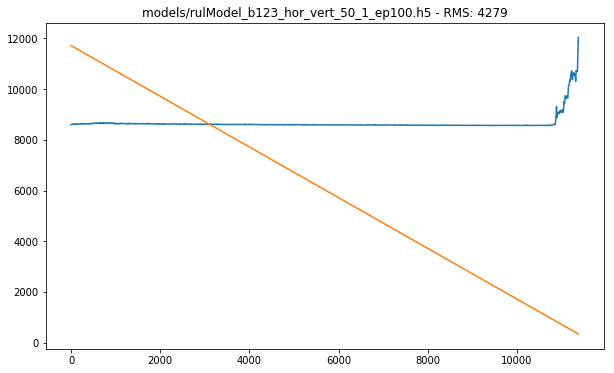

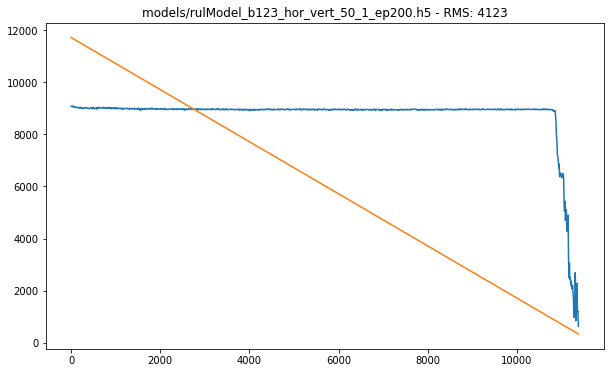

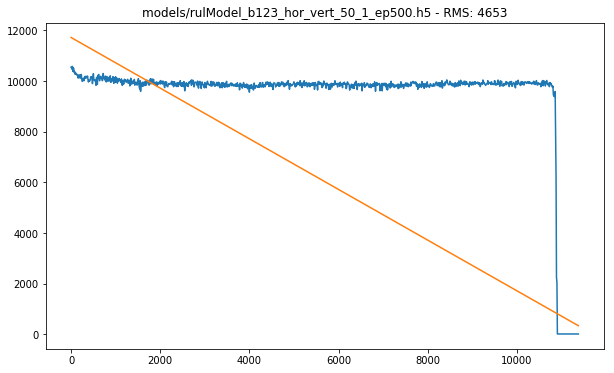

##################
# Test: 1_5
##################
2302/2302 [==============================] - 5s 2ms/step


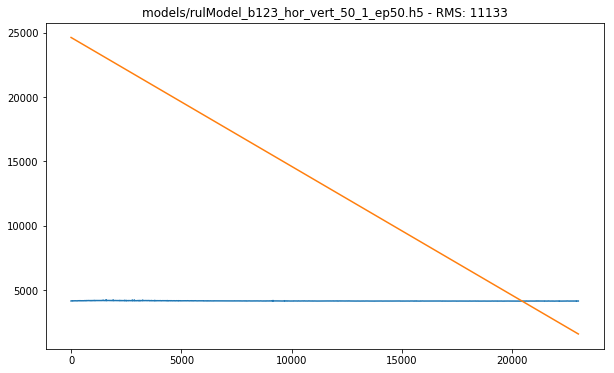

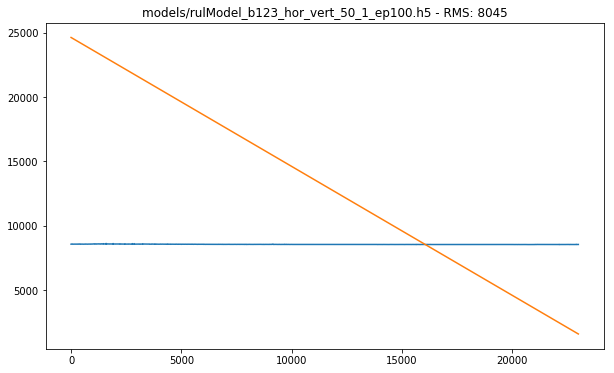

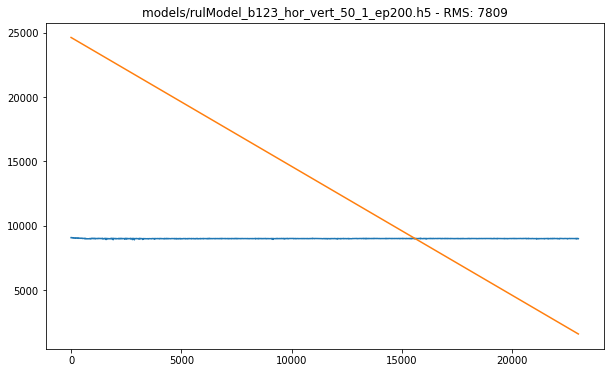

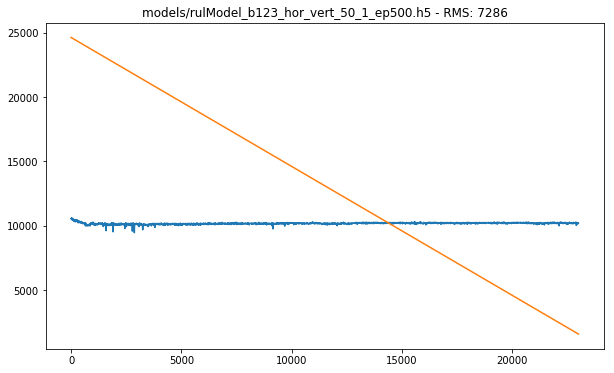

##################
# Test: 1_6
##################
2302/2302 [==============================] - 5s 2ms/step


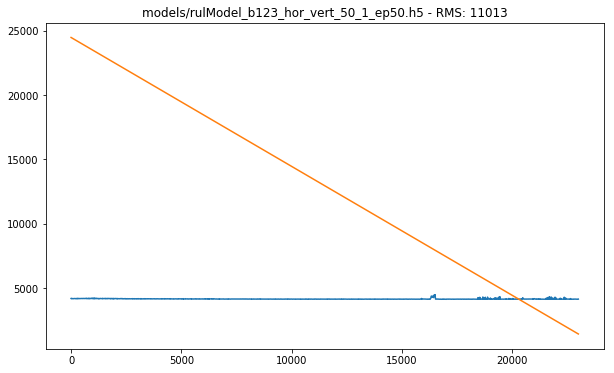

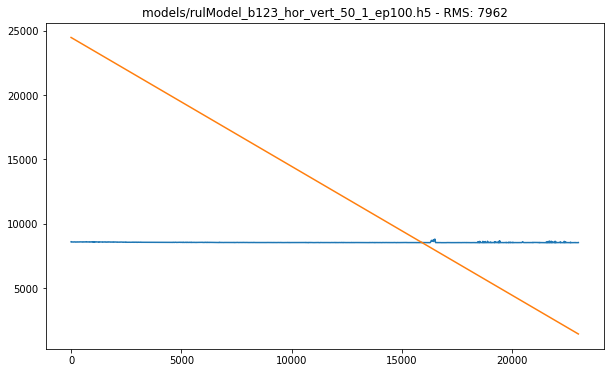

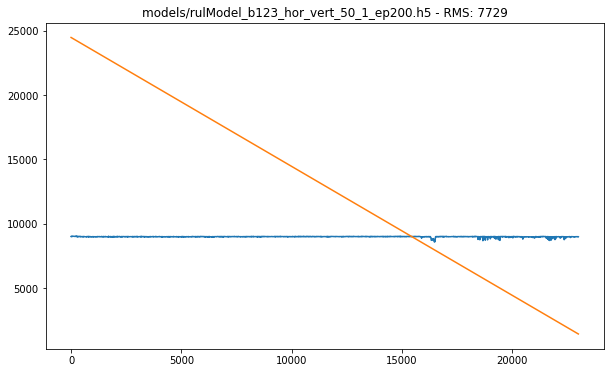

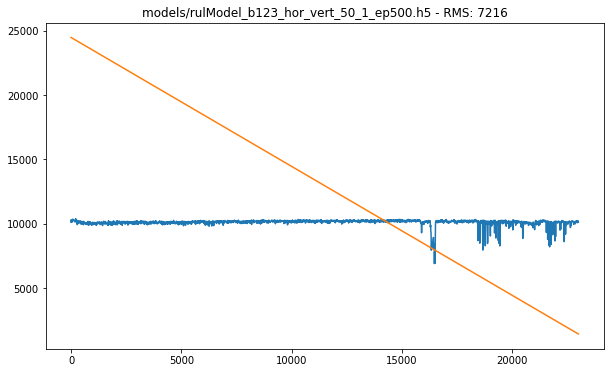

##################
# Test: 1_7
##################
1502/1502 [==============================] - 5s 3ms/step


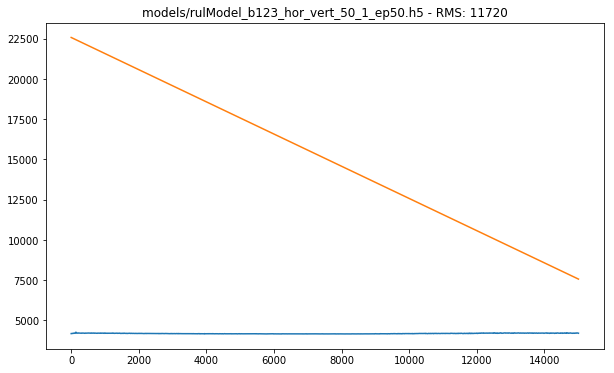

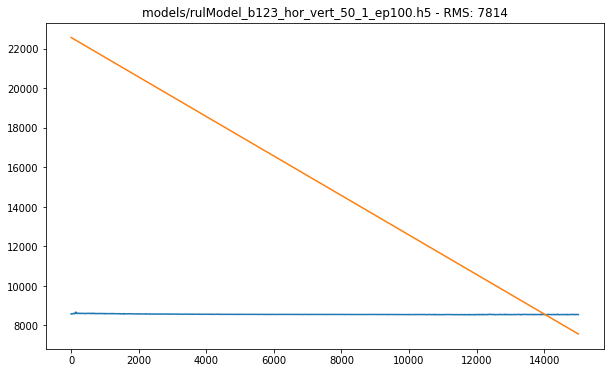

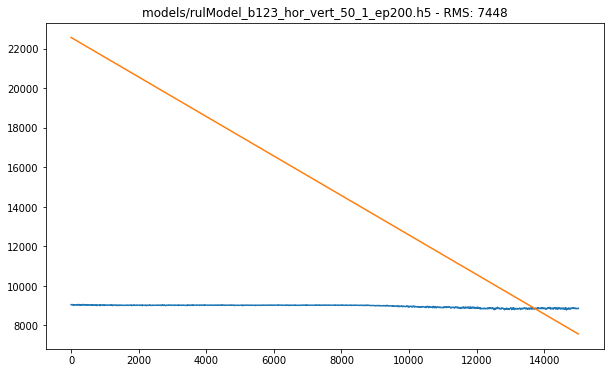

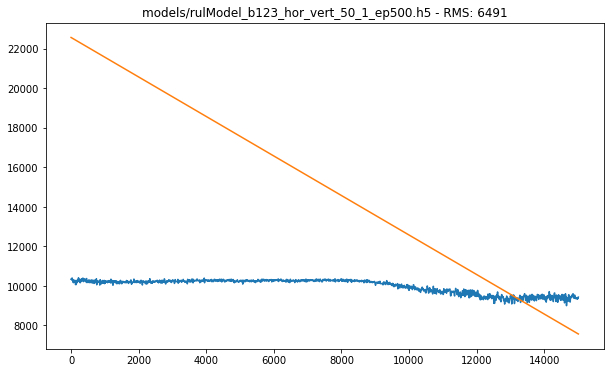

##################
# Test: 2_3
##################
1202/1202 [==============================] - 5s 4ms/step


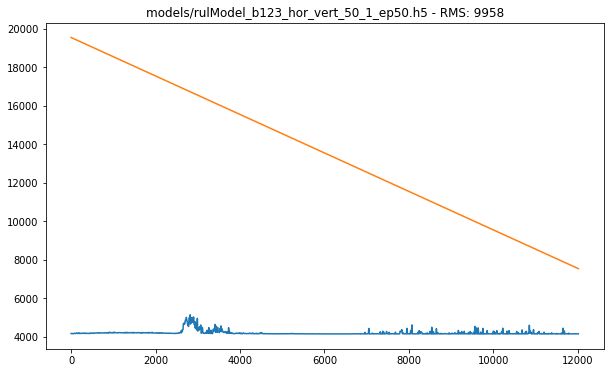

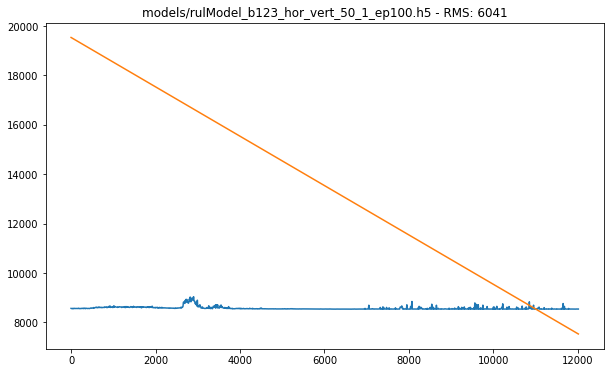

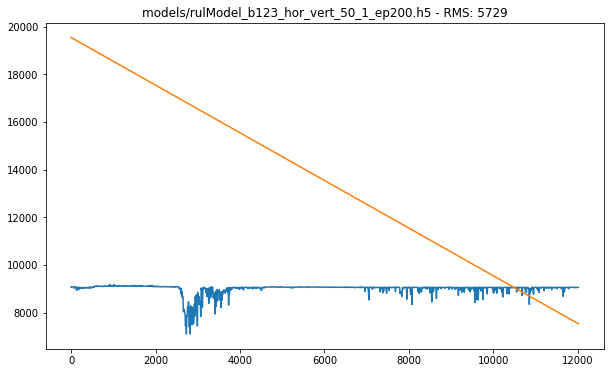

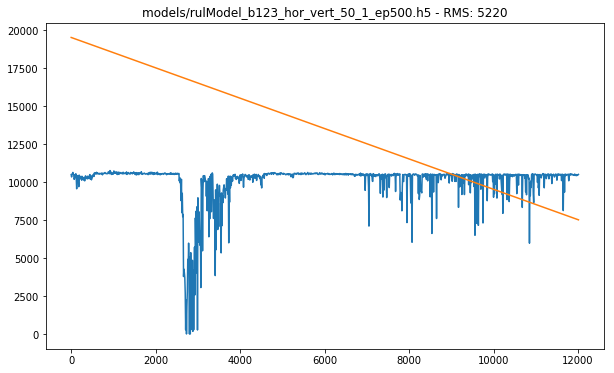

##################
# Test: 2_4
##################
612/612 [==============================] - 5s 9ms/step


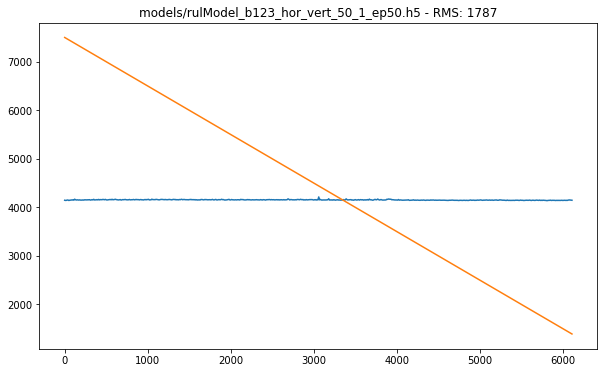

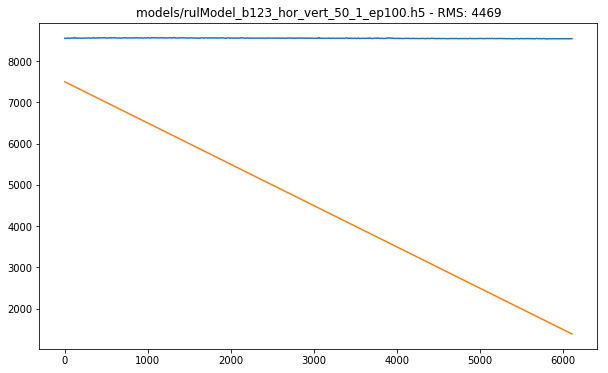

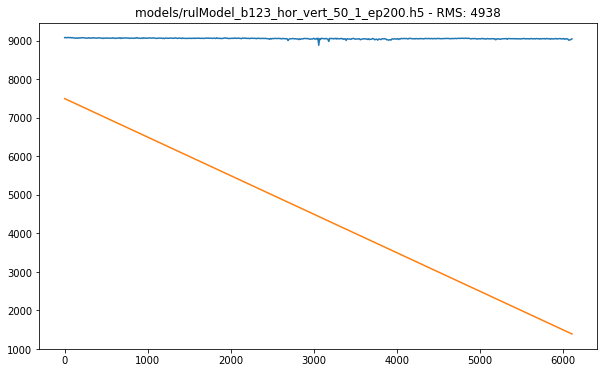

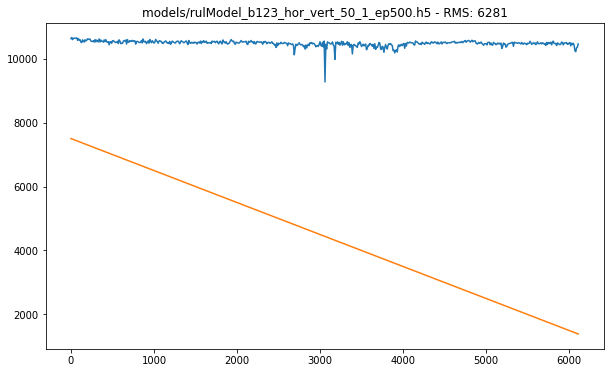

##################
# Test: 2_5
##################
2002/2002 [==============================] - 6s 3ms/step


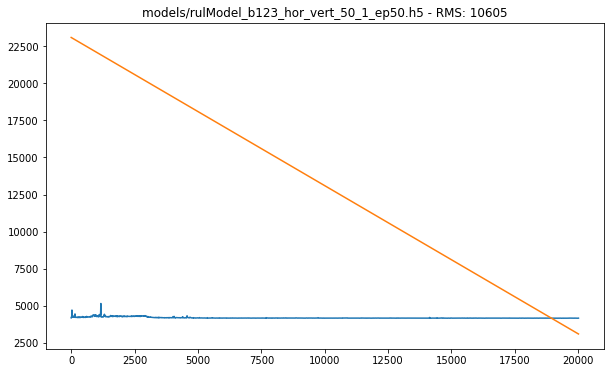

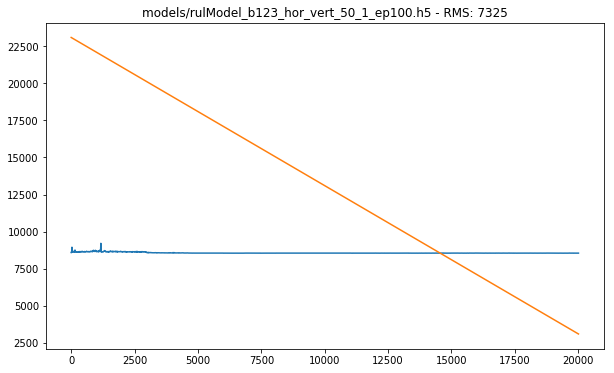

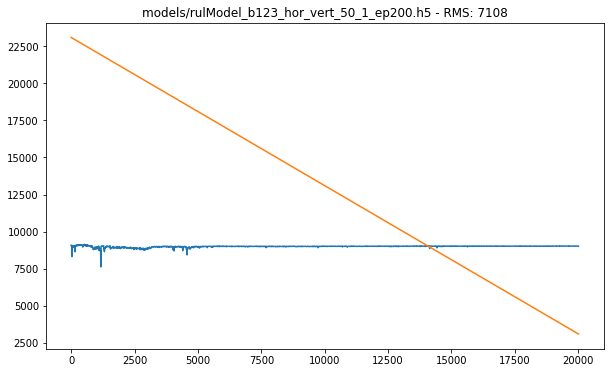

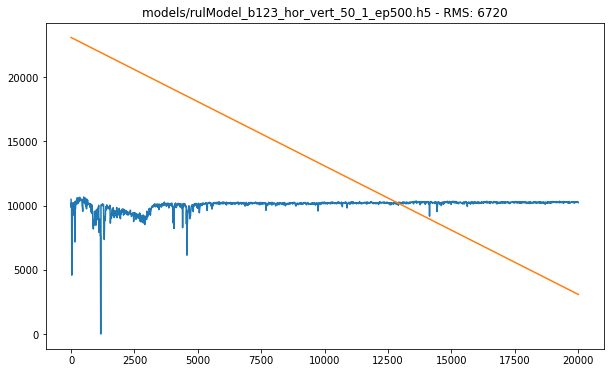

##################
# Test: 2_6
##################
572/572 [==============================] - 5s 10ms/step


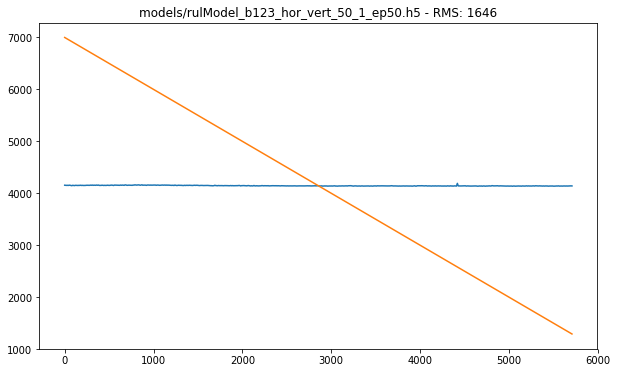

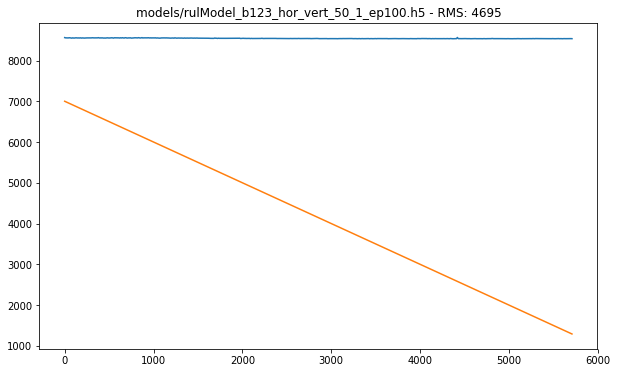

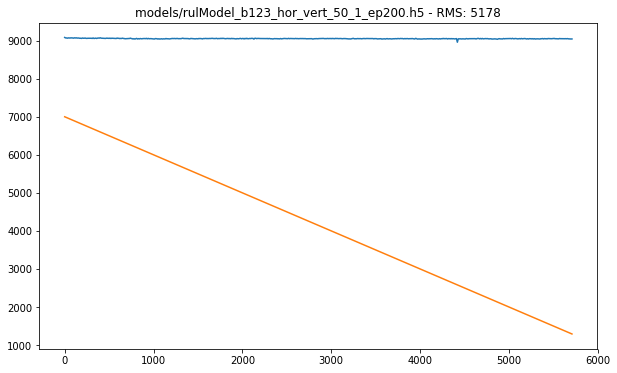

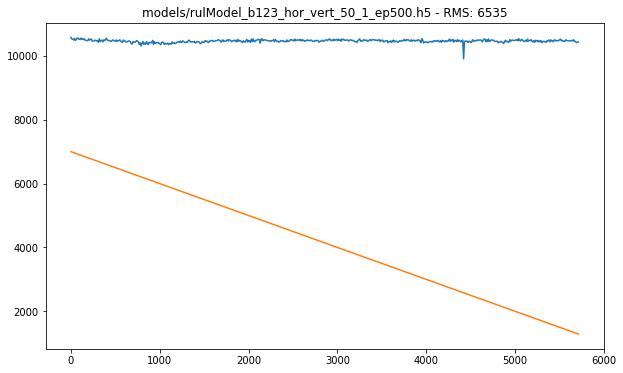

##################
# Test: 2_7
##################
172/172 [==============================] - 5s 32ms/step


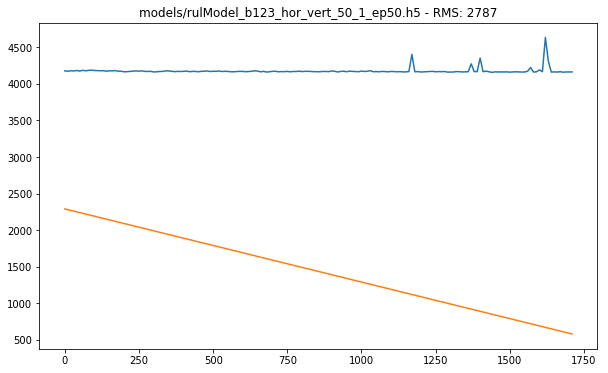

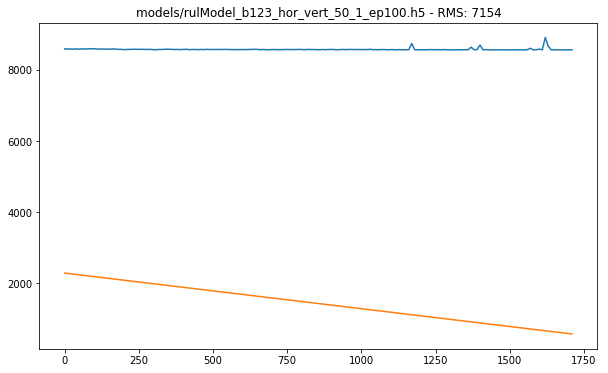

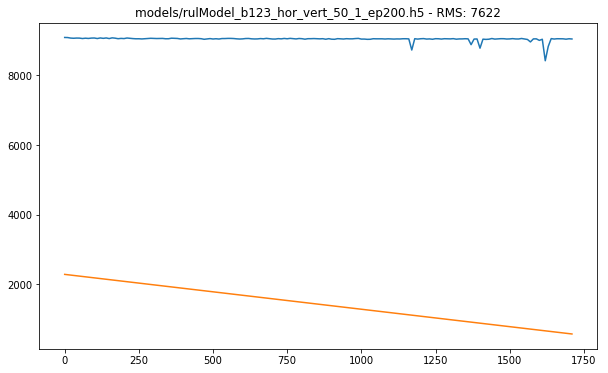

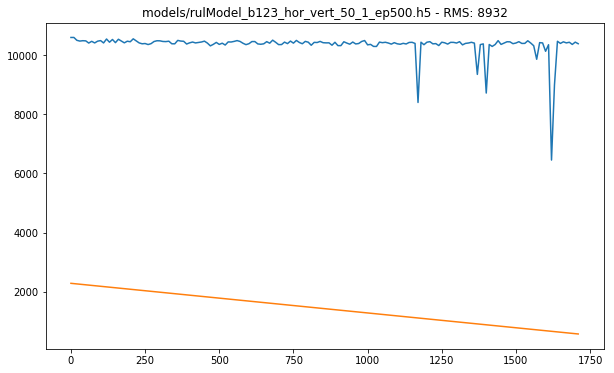

##################
# Test: 3_3
##################
352/352 [==============================] - 6s 16ms/step


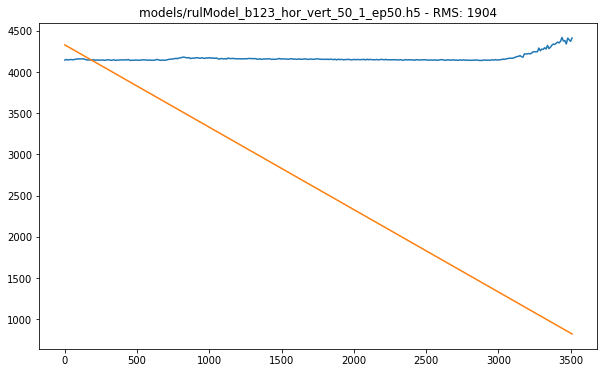

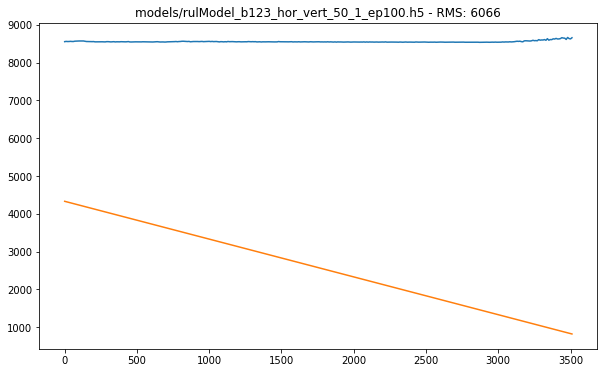

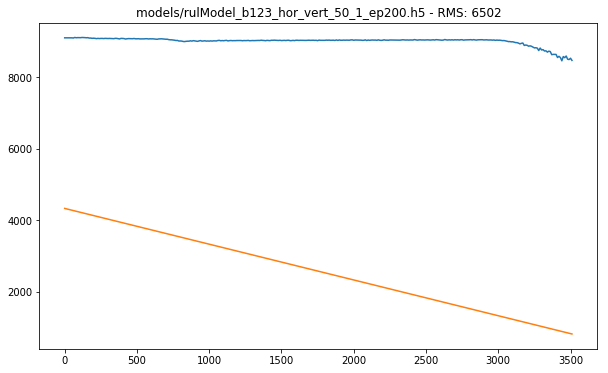

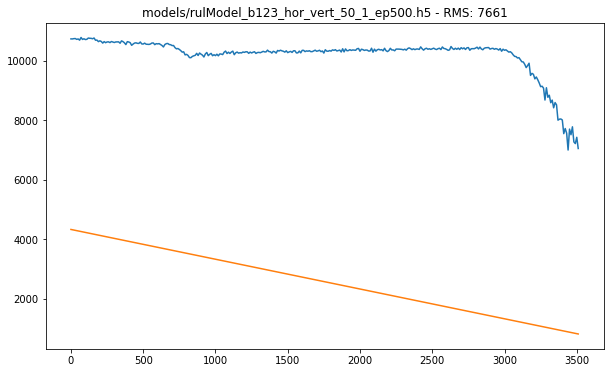

In [13]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)